In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
sell_prices = pd.read_csv('/Users/rakshitheaswara/Downloads/sell_prices.csv')
calendar = pd.read_csv('/Users/rakshitheaswara/Downloads/calendar.csv')

In [3]:
# Check structure
print("Sell Prices:")
sell_prices.info()
sell_prices.head()

print("\nCalendar:")
calendar.info()
calendar.head()


Sell Prices:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB

Calendar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   event_name_1  162 non-null    object
 7   event_type_1  162 non-null    object
 8   event_name_2  5 non-null      object
 9   event_type_2  5 non-null      object
 10  snap_CA       1969 non-null   int6

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [4]:
print(len(sell_prices['store_id'].unique()))
print(len(sell_prices['item_id'].unique()))


10
3049


In [5]:
sell_prices.isnull().sum()
calendar.isnull().sum()


date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.head()
calendar.dtypes

date            datetime64[ns]
wm_yr_wk                 int64
weekday                 object
wday                     int64
month                    int64
year                     int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
dtype: object

In [7]:
# Merge on 'wm_yr_wk'
merged = pd.merge(sell_prices, calendar, on='wm_yr_wk', how='left')

# Save merged file to your Downloads folder
merged_path = "/Users/rakshitheaswara/Downloads/merged.csv"
merged.to_csv(merged_path, index=False)

print("Merged file saved at:", merged_path)


Merged file saved at: /Users/rakshitheaswara/Downloads/merged.csv


In [8]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47735397 entries, 0 to 47735396
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   store_id      object        
 1   item_id       object        
 2   wm_yr_wk      int64         
 3   sell_price    float64       
 4   date          datetime64[ns]
 5   weekday       object        
 6   wday          int64         
 7   month         int64         
 8   year          int64         
 9   event_name_1  object        
 10  event_type_1  object        
 11  event_name_2  object        
 12  event_type_2  object        
 13  snap_CA       int64         
 14  snap_TX       int64         
 15  snap_WI       int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 5.7+ GB


In [9]:
merged.isnull().sum()

store_id               0
item_id                0
wm_yr_wk               0
sell_price             0
date                   0
weekday                0
wday                   0
month                  0
year                   0
event_name_1    43805087
event_type_1    43805087
event_name_2    47610424
event_type_2    47610424
snap_CA                0
snap_TX                0
snap_WI                0
dtype: int64

In [10]:
merged.head()

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,CA_1,HOBBIES_1_001,11325,9.58,2013-07-13,Saturday,1,7,2013,NaN,NaN,NaN,NaN,0,1,0
1,CA_1,HOBBIES_1_001,11325,9.58,2013-07-14,Sunday,2,7,2013,NaN,NaN,NaN,NaN,0,0,1
2,CA_1,HOBBIES_1_001,11325,9.58,2013-07-15,Monday,3,7,2013,NaN,NaN,NaN,NaN,0,1,1
3,CA_1,HOBBIES_1_001,11325,9.58,2013-07-16,Tuesday,4,7,2013,NaN,NaN,NaN,NaN,0,0,0
4,CA_1,HOBBIES_1_001,11325,9.58,2013-07-17,Wednesday,5,7,2013,NaN,NaN,NaN,NaN,0,0,0


In [11]:
min_date = merged['date'].min()
max_date = merged['date'].max()
print(f"Date Range: {min_date} to {max_date}")

Date Range: 2011-01-29 00:00:00 to 2016-06-19 00:00:00


In [12]:
sample_items = merged['item_id'].unique()[:3]
sample_stores = merged['store_id'].unique()[:2]

In [13]:
# Create a filtered sample for visualization
# Select 2 random item_ids and 2 random store_ids
sample_item_ids = merged['item_id'].drop_duplicates().sample(2, random_state=42)
sample_store_ids = merged['store_id'].drop_duplicates().sample(2, random_state=42)

# Filter the merged DataFrame
filtered_df = merged[
    merged['item_id'].isin(sample_item_ids) &
    merged['store_id'].isin(sample_store_ids)
]


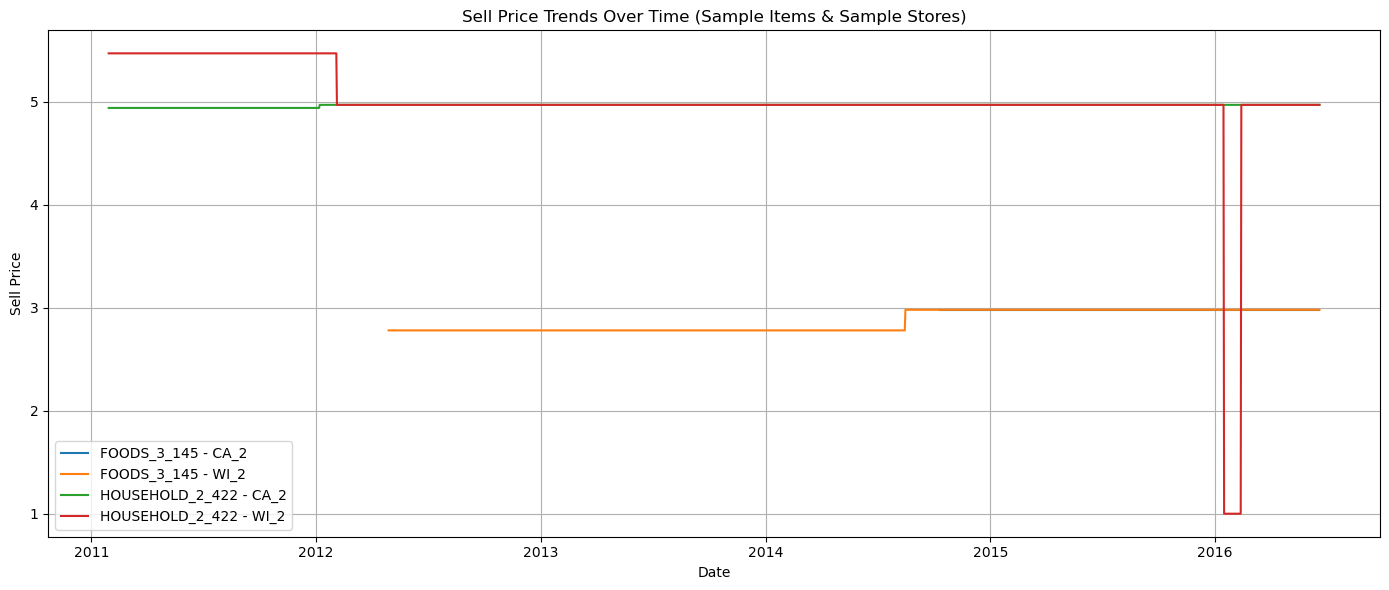

In [14]:
# --- 3. Line Plot: Sell Price Trends Over Time ---
plt.figure(figsize=(14, 6))
for (item, store), group in filtered_df.groupby(['item_id', 'store_id']):
    plt.plot(group['date'], group['sell_price'], label=f'{item} - {store}')
plt.title('Sell Price Trends Over Time (Sample Items & Sample Stores)')
plt.xlabel('Date')
plt.ylabel('Sell Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


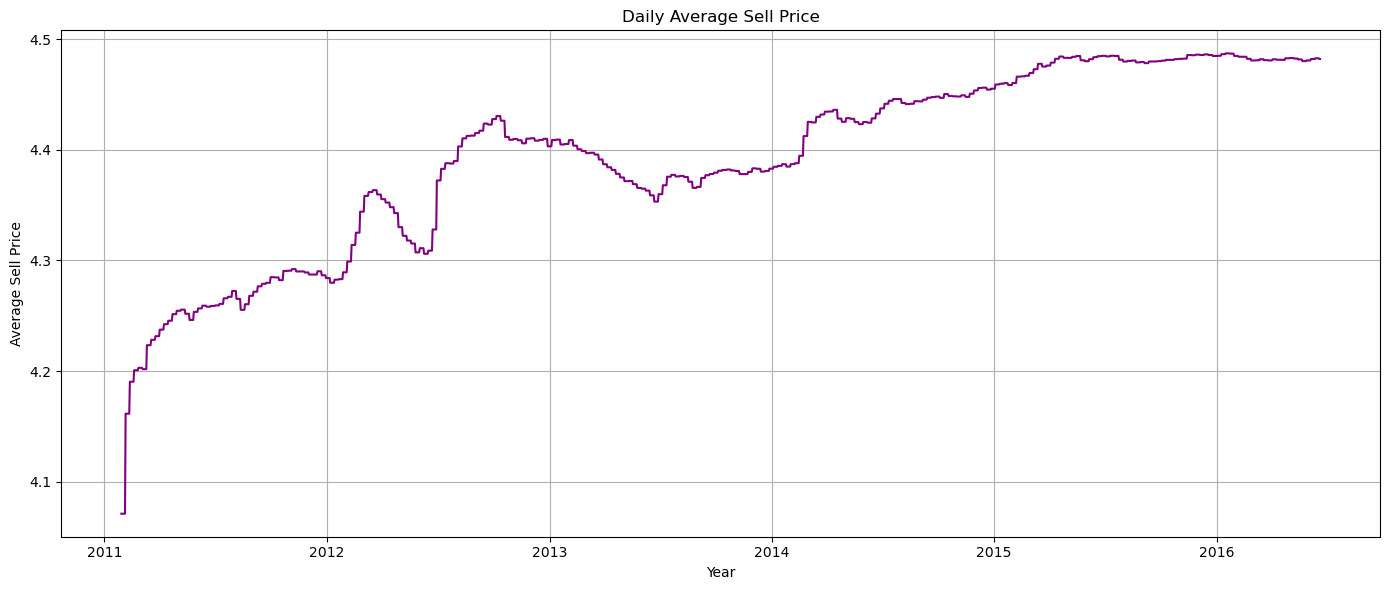

In [15]:
import matplotlib.dates as mdates

# Daily average sell price
daily_avg = merged.groupby('date')['sell_price'].mean().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(daily_avg['date'], daily_avg['sell_price'], color='purple')
plt.title('Daily Average Sell Price')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')

# Format x-axis to show year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())       # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY

plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
merged = merged.sort_values("date")

In [17]:
merged.head(10)

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
24009595,TX_2,HOBBIES_1_143,11101,7.74,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
31467975,TX_3,FOODS_1_138,11101,2.18,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
31445141,TX_3,FOODS_1_124,11101,2.00,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
10486542,CA_3,HOUSEHOLD_1_179,11101,0.94,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
9923892,CA_3,HOBBIES_1_382,11101,1.97,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
6922141,CA_2,HOUSEHOLD_2_211,11101,20.00,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
18046286,CA_4,FOODS_3_280,11101,5.26,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
15465180,CA_4,HOUSEHOLD_1_310,11101,7.97,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
47331471,WI_3,FOODS_3_567,11101,1.98,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4595440,CA_1,FOODS_3_651,11101,3.76,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [18]:
# Optimize sell_prices
sell_prices['store_id'] = sell_prices['store_id'].astype('category')
sell_prices['item_id'] = sell_prices['item_id'].astype('category')

# Optimize calendar
calendar['weekday'] = calendar['weekday'].astype('category')
calendar['event_name_1'] = calendar['event_name_1'].astype('category')
calendar['event_type_1'] = calendar['event_type_1'].astype('category')
calendar['event_name_2'] = calendar['event_name_2'].astype('category')
calendar['event_type_2'] = calendar['event_type_2'].astype('category')


In [19]:
print("Memory Usage (Optimized):")
print("Sell Prices:", sell_prices.memory_usage(deep=True).sum() / 1024**2, "MB")
print("Calendar:", calendar.memory_usage(deep=True).sum() / 1024**2, "MB")


Memory Usage (Optimized):
Sell Prices: 124.20330715179443 MB
Calendar: 0.13409423828125 MB


In [20]:
# Numerical
print("Sell Prices - Describe:")
print(sell_prices.describe())

# Categorical overview
print("\nUnique Stores:", sell_prices['store_id'].nunique())
print("Unique Items:", sell_prices['item_id'].nunique())
print("Unique Weeks:", sell_prices['wm_yr_wk'].nunique())

print("\nCalendar Events Breakdown:")
print(calendar[['event_name_1', 'event_type_1']].dropna().value_counts().shape[0])


Sell Prices - Describe:
           wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

Unique Stores: 10
Unique Items: 3049
Unique Weeks: 282

Calendar Events Breakdown:
30


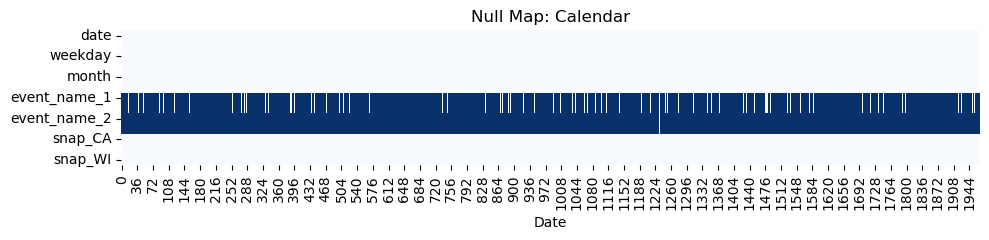

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calendar Null Heatmap
plt.figure(figsize=(10, 2.5))
sns.heatmap(calendar.isnull().T, cbar=False, cmap='Blues')
plt.title('Null Map: Calendar')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


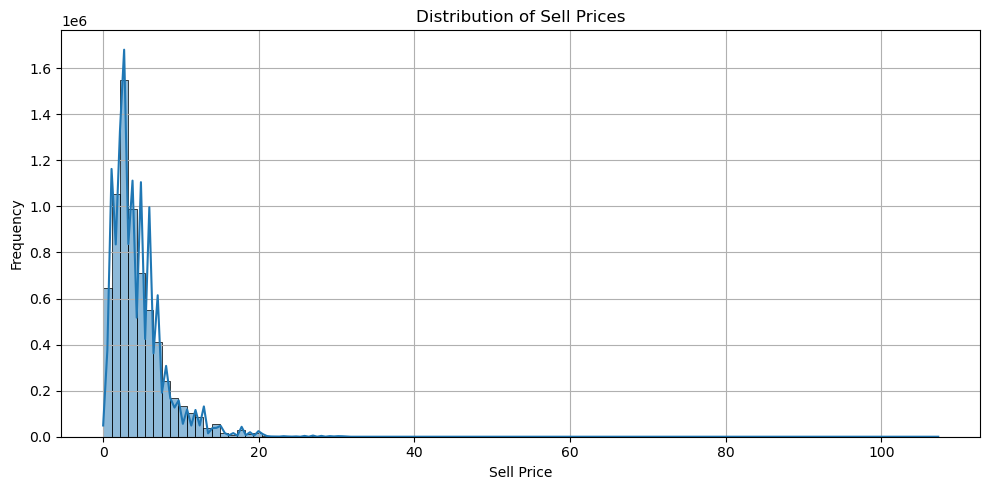

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(sell_prices['sell_price'], bins=100, kde=True)
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


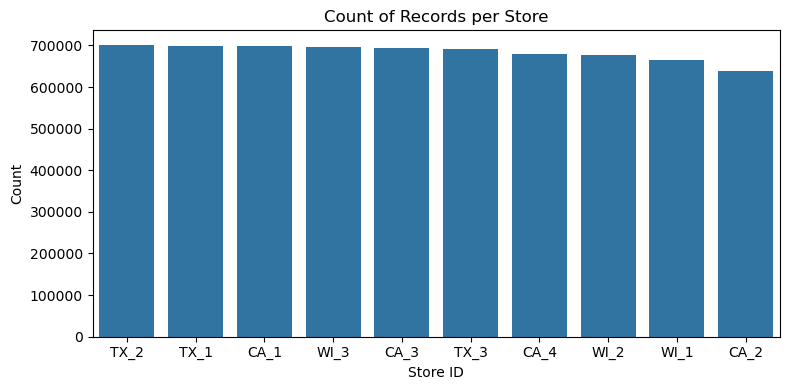

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=sell_prices, x='store_id', order=sell_prices['store_id'].value_counts().index)
plt.title('Count of Records per Store')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


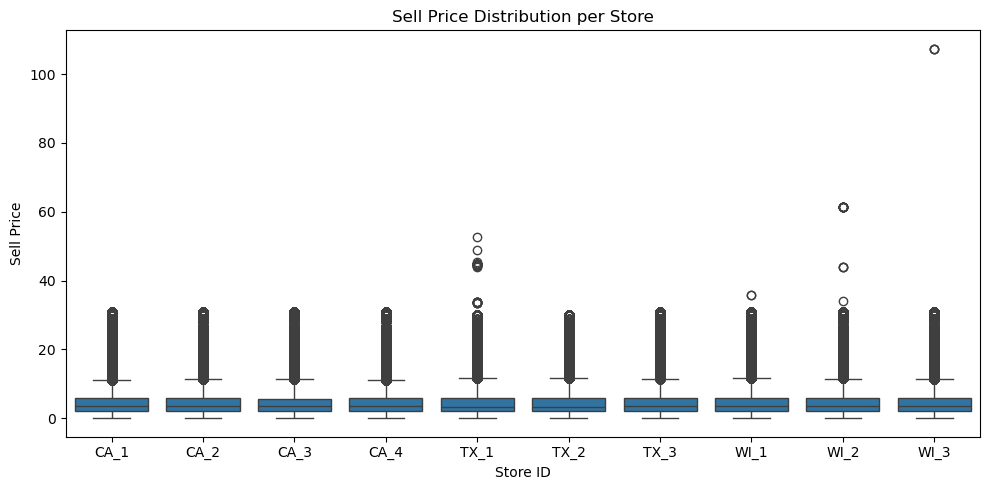

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=sell_prices, x='store_id', y='sell_price')
plt.title('Sell Price Distribution per Store')
plt.xlabel('Store ID')
plt.ylabel('Sell Price')
plt.tight_layout()
plt.show()


In [25]:
summary_table = filtered_df.groupby(['item_id', 'store_id'])['sell_price'].agg(
    ['min', 'max', 'mean', 'std', 'count']
).reset_index().sort_values(by='mean', ascending=False)

summary_table.columns = ['Item ID', 'Store ID', 'Min Price', 'Max Price', 'Avg Price', 'Std Dev', 'Records']
summary_table


,Item ID,Store ID,Min Price,Max Price,Avg Price,Std Dev,Records
3,HOUSEHOLD_2_422,WI_2,1.00,5.47,5.007755,0.519561,1969
2,HOUSEHOLD_2_422,CA_2,4.94,4.97,4.964774,0.011381,1969
0,FOODS_3_145,CA_2,2.98,2.98,2.980000,0.000000,618
1,FOODS_3_145,WI_2,2.78,2.98,2.869036,0.099430,1514


In [26]:
# Example if you later join demand data
# For now we can test with dummy features (price + week number)

correlation = filtered_df[['wm_yr_wk', 'sell_price']].corr()
print(correlation)


            wm_yr_wk  sell_price
wm_yr_wk    1.000000   -0.337777
sell_price -0.337777    1.000000


In [27]:
# Check structure
print("Merged Dataset Shape:", merged.shape)
merged[['store_id', 'item_id', 'wm_yr_wk', 'date', 'sell_price']].head()


Merged Dataset Shape: (47735397, 16)


,store_id,item_id,wm_yr_wk,date,sell_price
24009595,TX_2,HOBBIES_1_143,11101,2011-01-29,7.74
31467975,TX_3,FOODS_1_138,11101,2011-01-29,2.18
31445141,TX_3,FOODS_1_124,11101,2011-01-29,2.00
10486542,CA_3,HOUSEHOLD_1_179,11101,2011-01-29,0.94
9923892,CA_3,HOBBIES_1_382,11101,2011-01-29,1.97


In [28]:
# Create year-month field
merged['year_month'] = merged['date'].dt.to_period('M')


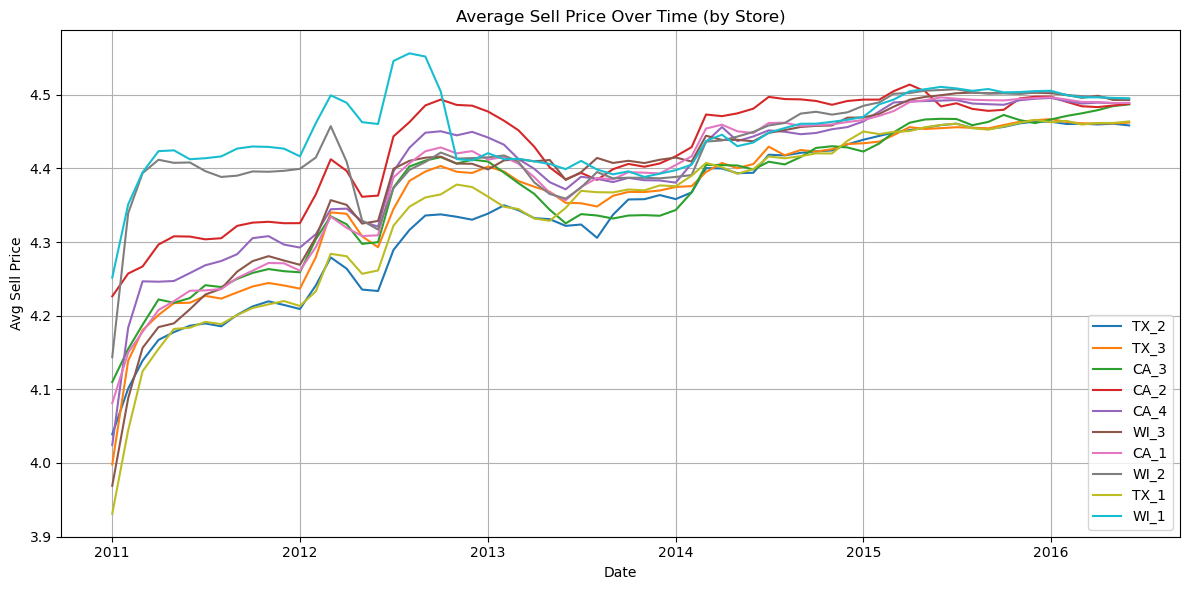

In [29]:
plt.figure(figsize=(12, 6))
for store in merged['store_id'].unique():
    store_df = merged[merged['store_id'] == store]
    avg_price_by_month = store_df.groupby('year_month')['sell_price'].mean()
    plt.plot(avg_price_by_month.index.to_timestamp(), avg_price_by_month.values, label=f'{store}')

plt.title('Average Sell Price Over Time (by Store)')
plt.xlabel('Date')
plt.ylabel('Avg Sell Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


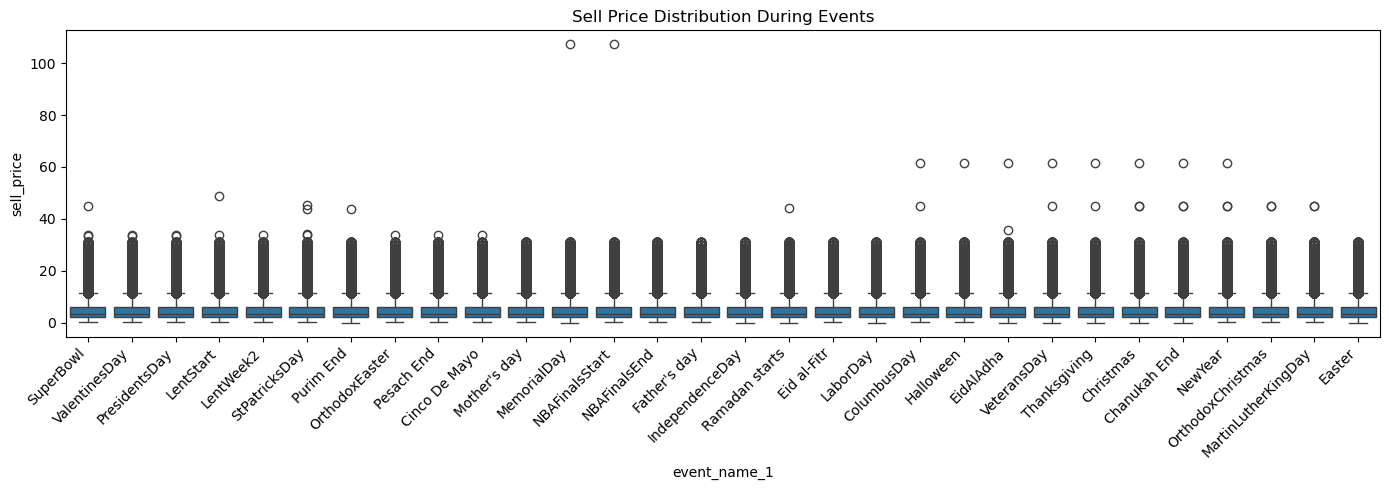

In [30]:
# Filter rows where events are not null
event_df = merged[merged['event_name_1'].notnull()]

plt.figure(figsize=(14, 5))
sns.boxplot(data=event_df, x='event_name_1', y='sell_price')
plt.xticks(rotation=45, ha='right')
plt.title('Sell Price Distribution During Events')
plt.tight_layout()
plt.show()



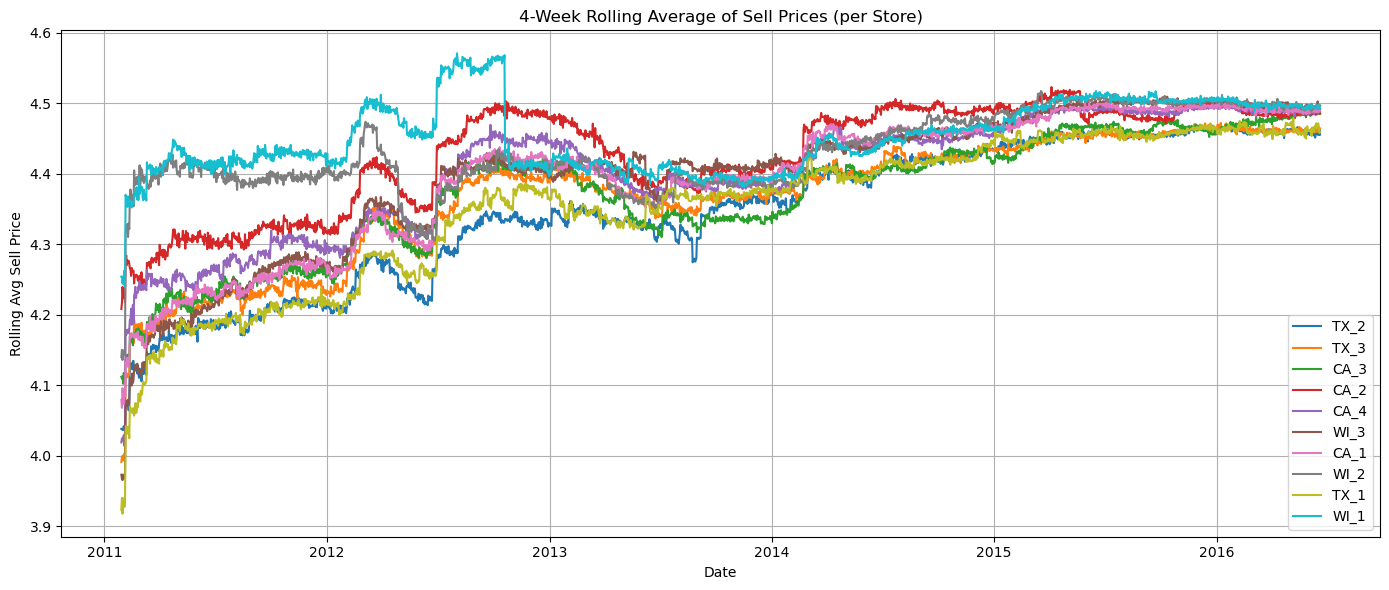

In [31]:
plt.figure(figsize=(14, 6))

for store in merged['store_id'].unique():
    store_df = merged[merged['store_id'] == store]
    store_df = store_df.sort_values('date')
    store_df['rolling_price'] = store_df['sell_price'].rolling(window=7).mean()

    avg_by_week = store_df.groupby('date')['rolling_price'].mean()
    plt.plot(avg_by_week.index, avg_by_week.values, label=f'{store}')

plt.title('4-Week Rolling Average of Sell Prices (per Store)')
plt.xlabel('Date')
plt.ylabel('Rolling Avg Sell Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


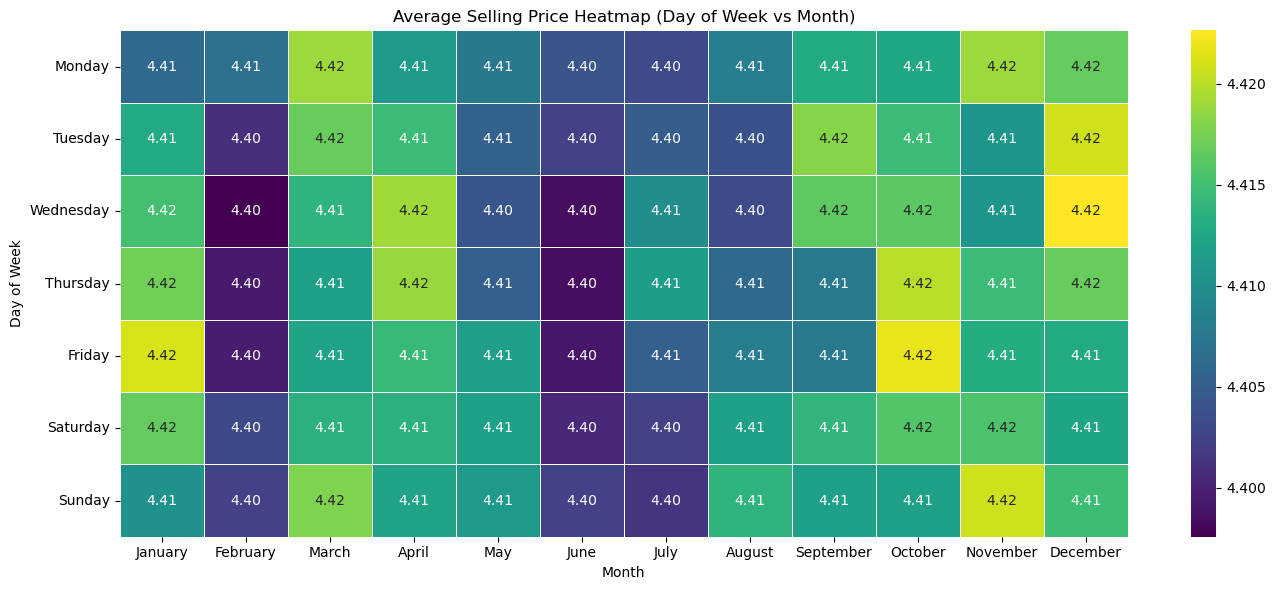

In [32]:
merged['Month'] = merged['date'].dt.month_name() # e.g., January, February
merged['DayOfWeek'] = merged['date'].dt.day_name() # e.g., Monday, Tuesday
# Optional: Order days and months for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']
# 3. Compute average selling price
heatmap_data = merged.groupby(['DayOfWeek', 'Month'])['sell_price'].mean().reset_index()
# 4. Pivot for heatmap
heatmap_pivot = heatmap_data.pivot(index='DayOfWeek', columns='Month', values='sell_price')
heatmap_pivot = heatmap_pivot.reindex(index=day_order, columns=month_order)
# 5. Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Selling Price Heatmap (Day of Week vs Month)')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

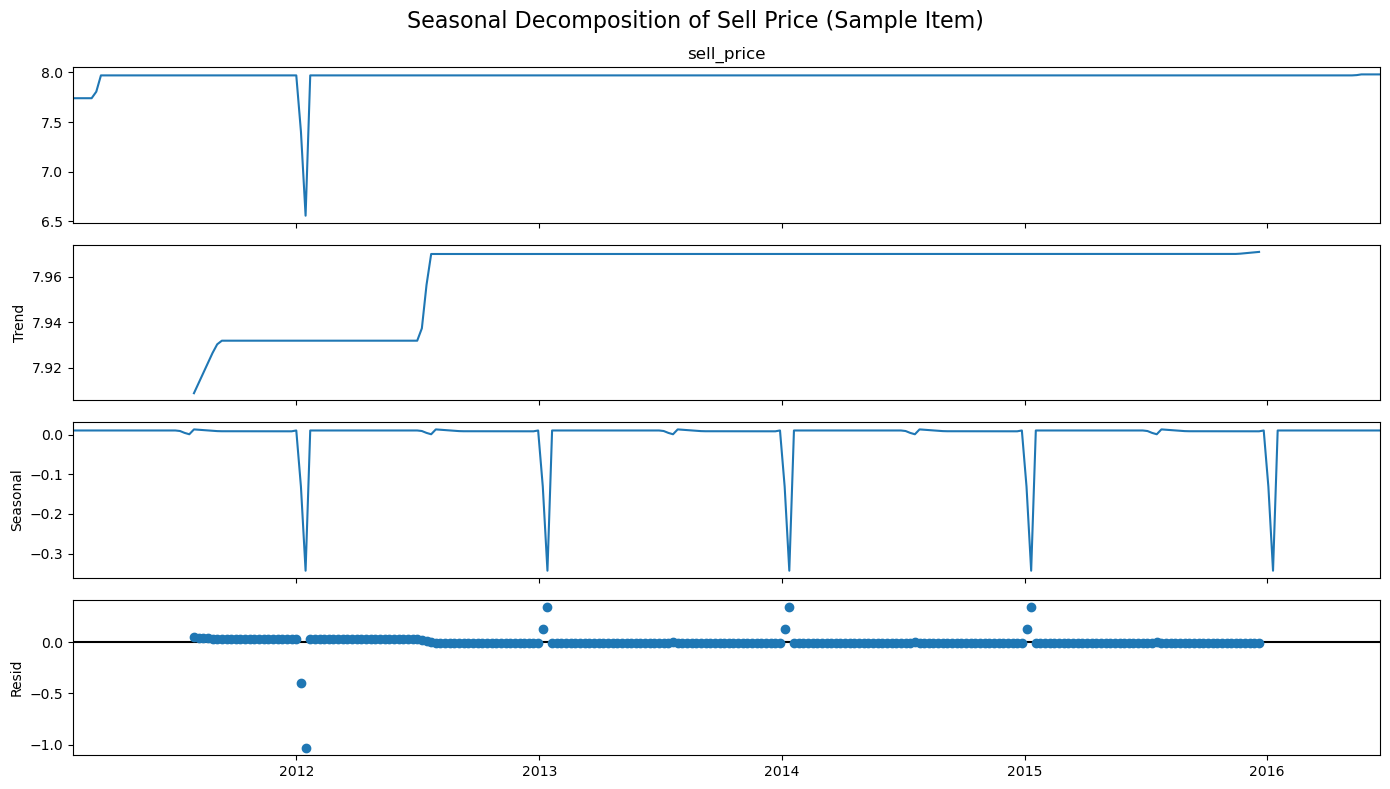

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose a stable item/store
sample_series = merged[
    (merged['store_id'] == merged['store_id'].unique()[0]) &
    (merged['item_id'] == merged['item_id'].unique()[0])
].sort_values('date')

# Set date as index for time series
ts = sample_series.set_index('date')['sell_price'].resample('W').mean()

# Fill missing weeks via interpolation
ts = ts.interpolate()

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.suptitle('Seasonal Decomposition of Sell Price (Sample Item)', fontsize=16)
plt.tight_layout()
plt.show()



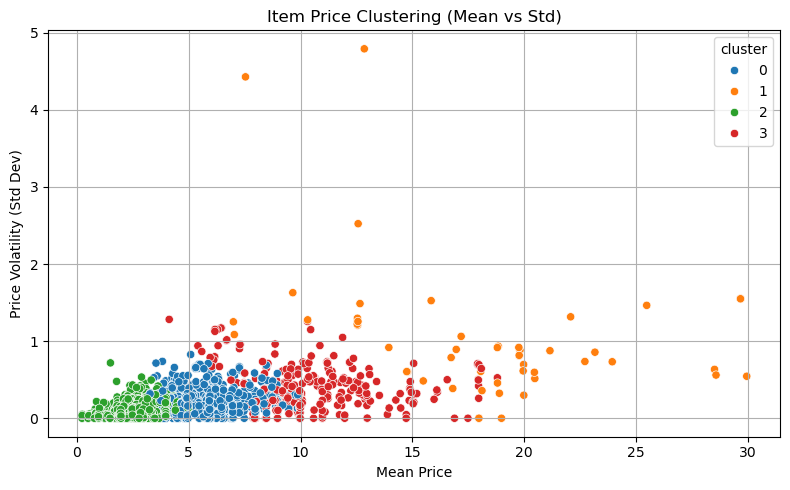

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate item-level stats
item_stats = merged.groupby('item_id')['sell_price'].agg(['mean', 'std', 'min', 'max']).fillna(0)

# Scale
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(item_stats)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
item_stats['cluster'] = kmeans.fit_predict(scaled_stats)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=item_stats, x='mean', y='std', hue='cluster', palette='tab10')
plt.title('Item Price Clustering (Mean vs Std)')
plt.xlabel('Mean Price')
plt.ylabel('Price Volatility (Std Dev)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Define event-related columns
event_columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

# Ensure columns are categorical and handle missing values
for col in event_columns:
    if not pd.api.types.is_categorical_dtype(merged[col]):
        merged[col] = merged[col].astype('category')
    
    if 'No_Event' not in merged[col].cat.categories:
        merged[col] = merged[col].cat.add_categories('No_Event')
    
    merged[col] = merged[col].fillna('No_Event')




/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2845348212.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(merged[col]):
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2845348212.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(merged[col]):
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2845348212.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(merged[col]):
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2845348212.py:6: DeprecationWarning: is_categorical_dtype is deprecated and w

In [36]:
unique_item_count_per_store = merged.groupby('store_id')['item_id'].nunique().reset_index()
unique_item_count_per_store.columns = ['store_id', 'unique_item_count']
print(unique_item_count_per_store)


  store_id  unique_item_count
0     CA_1               3049
1     CA_2               3049
2     CA_3               3049
3     CA_4               3049
4     TX_1               3049
5     TX_2               3049
6     TX_3               3049
7     WI_1               3049
8     WI_2               3049
9     WI_3               3049


In [37]:
ca1_data = merged[merged['store_id'] == 'CA_1']
unique_items = ca1_data['item_id'].unique()
hobbies_count = sum(item.startswith('HOBBIES') for item in unique_items)
household_count = sum(item.startswith('HOUSEHOLD') for item in unique_items)
foods_count = sum(item.startswith('FOODS') for item in unique_items)
print(f"HOBBIES items: {hobbies_count}")
print(f"HOUSEHOLD items: {household_count}")
print(f"FOODS items: {foods_count}")


HOBBIES items: 565
HOUSEHOLD items: 1047
FOODS items: 1437


In [38]:
counts = {}
prefixes = ['HOBBIES', 'HOUSEHOLD', 'FOODS']
for prefix in prefixes:
    for num in range(1, 10):
        pattern = f"{prefix}_{num}"
        count = sum(item.startswith(pattern) for item in unique_items)
        if count > 0:
            counts[pattern] = count
result_df = pd.DataFrame(list(counts.items()), columns=['Category', 'Count'])
print(result_df)

      Category  Count
0    HOBBIES_1    416
1    HOBBIES_2    149
2  HOUSEHOLD_1    532
3  HOUSEHOLD_2    515
4      FOODS_1    216
5      FOODS_2    398
6      FOODS_3    823


In [39]:
events_df = calendar[calendar['event_name_1'].notnull()][
    ['date', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
]
events_df['event_1'] = events_df.apply(
    lambda x: f"{x['event_name_1']} ({x['event_type_1']})" if pd.notnull(x['event_name_1']) else None, axis=1
)
events_df['event_2'] = events_df.apply(
    lambda x: f"{x['event_name_2']} ({x['event_type_2']})" if pd.notnull(x['event_name_2']) else None, axis=1
)
final_events = events_df[['date', 'event_1', 'event_2']].drop_duplicates()
final_events['formatted_date'] = final_events['date'].dt.strftime('%d %B %Y')
event_1_grouped = final_events.dropna(subset=['event_1']).groupby('event_1')['formatted_date'].unique().reset_index()
event_1_grouped.columns = ['Event_1', 'Distinct_Dates']
event_1_grouped['Count'] = event_1_grouped['Distinct_Dates'].apply(len)
event_2_grouped = final_events.dropna(subset=['event_2']).groupby('event_2')['formatted_date'].unique().reset_index()
event_2_grouped.columns = ['Event_2', 'Distinct_Dates']
event_2_grouped['Count'] = event_2_grouped['Distinct_Dates'].apply(len)
display(event_1_grouped)
display(event_2_grouped)


,Event_1,Distinct_Dates,Count
0,Chanukah End (Religious),"[28 December 2011, 16 December 2012, 05 Decemb...",5
1,Christmas (National),"[25 December 2011, 25 December 2012, 25 Decemb...",5
2,Cinco De Mayo (Cultural),"[05 May 2011, 05 May 2012, 05 May 2014, 05 May...",5
3,ColumbusDay (National),"[10 October 2011, 08 October 2012, 14 October ...",5
4,Easter (Cultural),"[08 April 2012, 31 March 2013, 20 April 2014, ...",5
5,Eid al-Fitr (Religious),"[31 August 2011, 19 August 2012, 08 August 201...",5
6,EidAlAdha (Religious),"[07 November 2011, 26 October 2012, 15 October...",5
7,Father's day (Cultural),"[19 June 2011, 17 June 2012, 16 June 2013, 21 ...",4
8,Halloween (Cultural),"[31 October 2011, 31 October 2012, 31 October ...",5
9,IndependenceDay (National),"[04 July 2011, 04 July 2012, 04 July 2013, 04 ...",5


,Event_2,Distinct_Dates,Count
0,Cinco De Mayo (Cultural),[05 May 2013],1
1,Easter (Cultural),[24 April 2011],1
2,Father's day (Cultural),"[15 June 2014, 19 June 2016]",2
3,OrthodoxEaster (Religious),[20 April 2014],1


In [40]:
print(calendar['event_type_1'].unique())
print(calendar['event_type_2'].unique())

[NaN, 'Sporting', 'Cultural', 'National', 'Religious']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']
[NaN, 'Cultural', 'Religious']
Categories (2, object): ['Cultural', 'Religious']


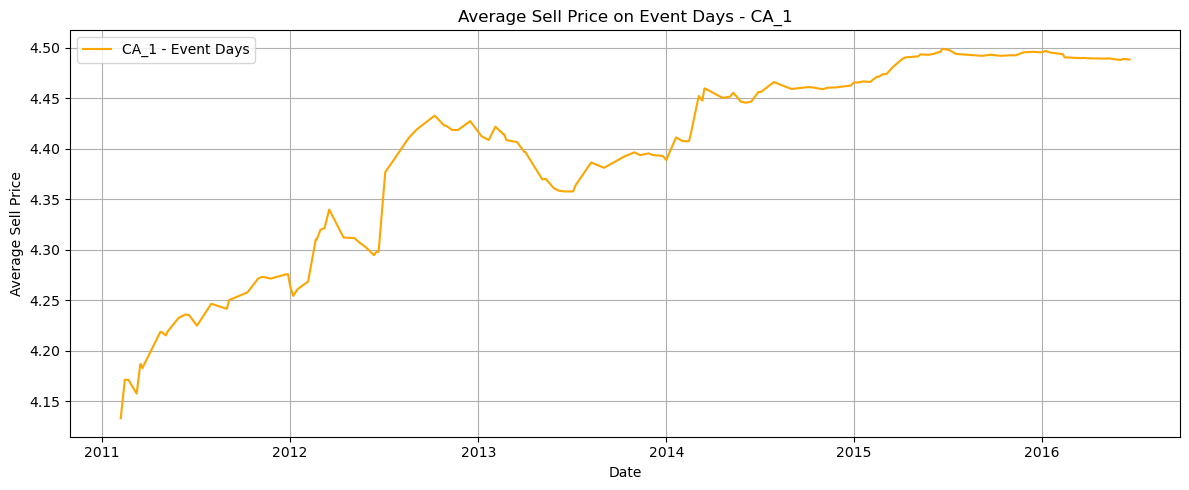

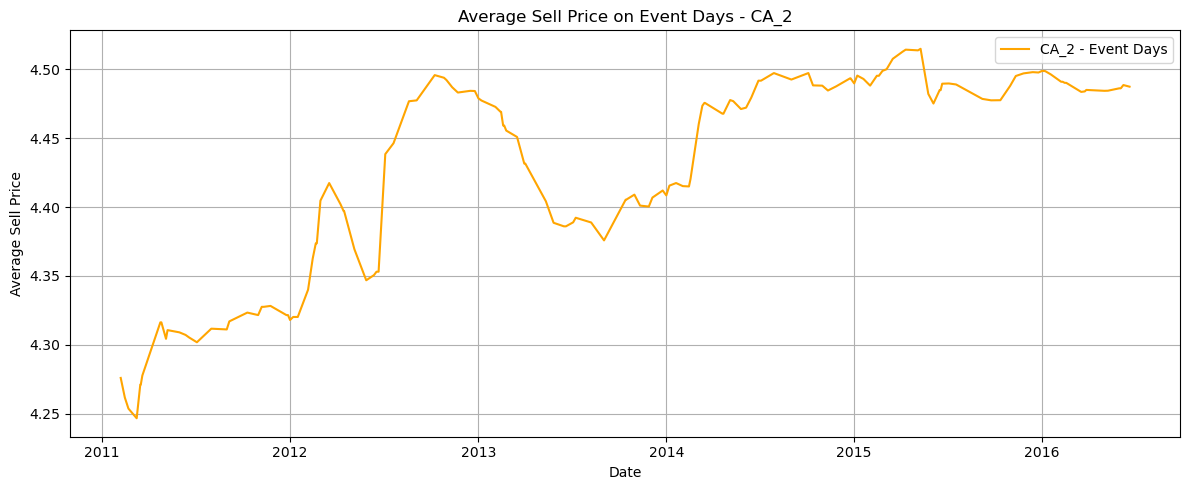

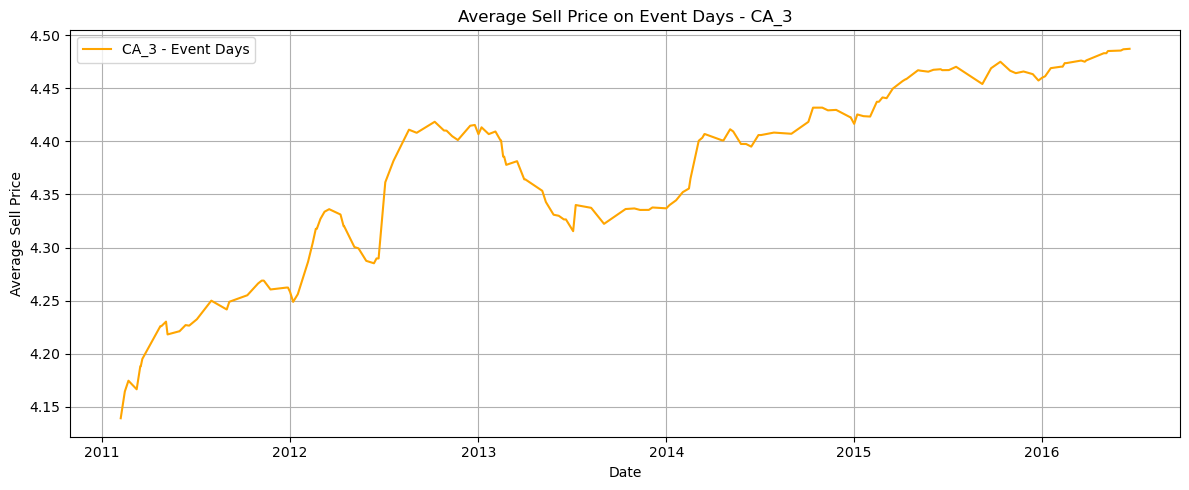

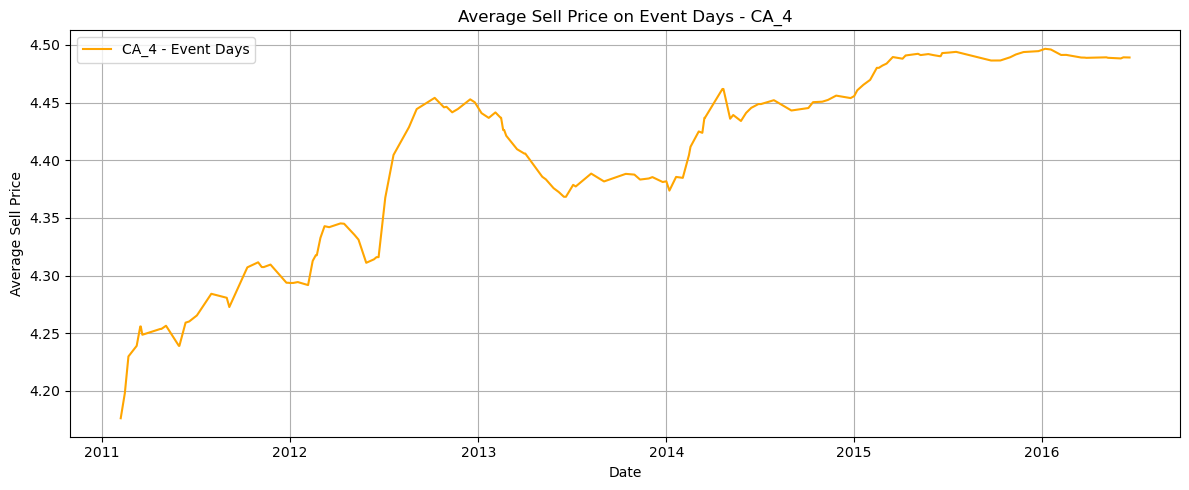

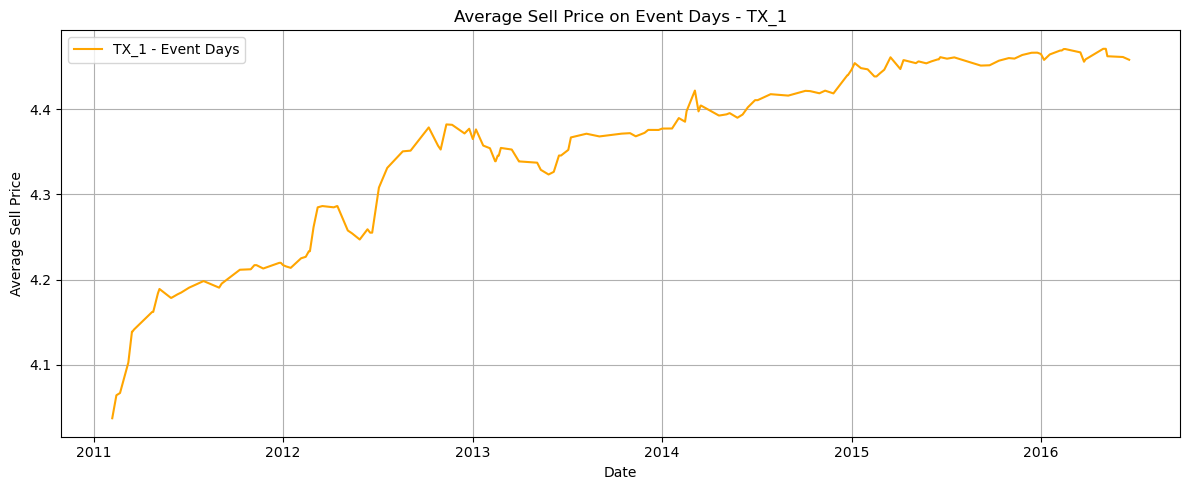

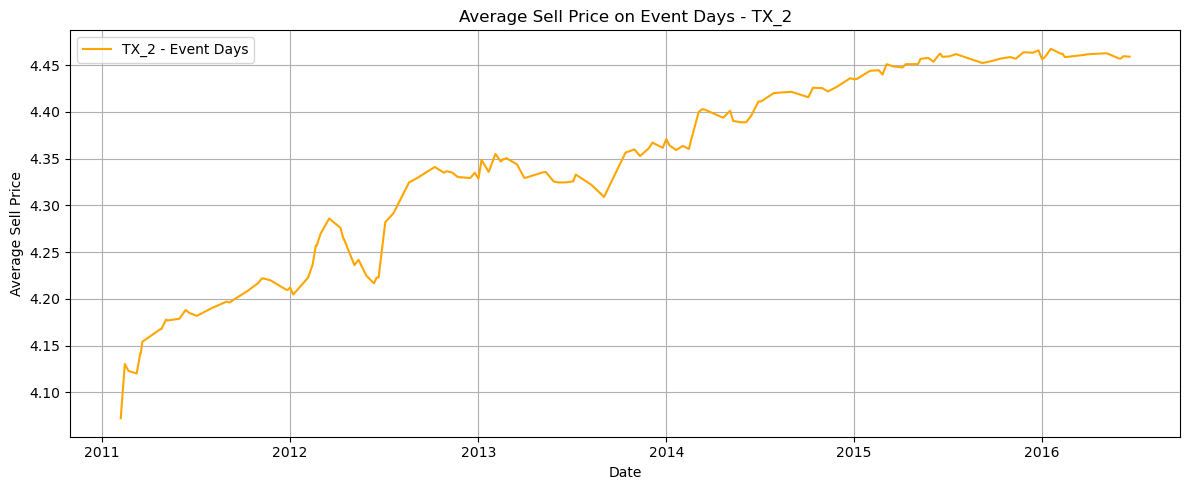

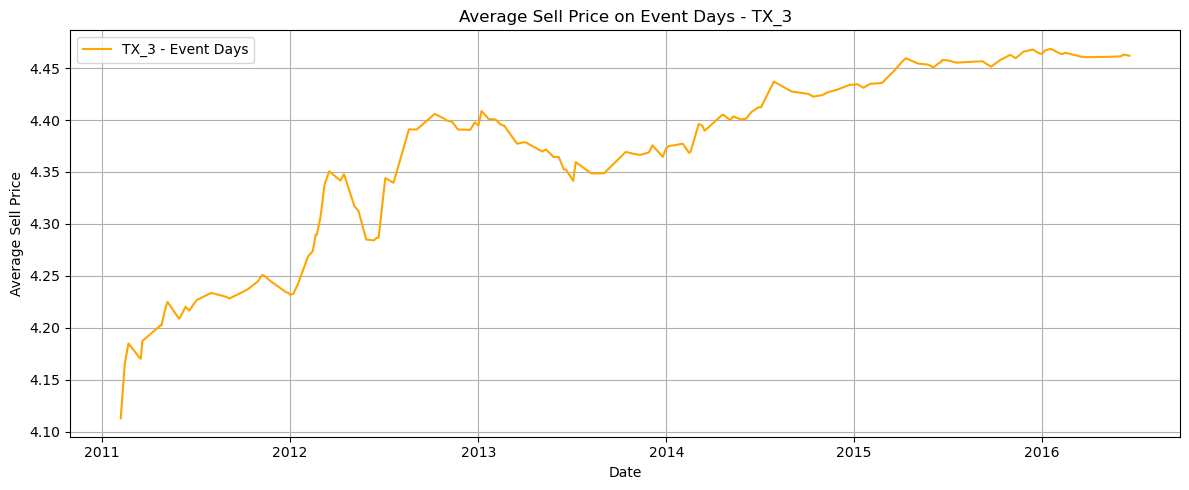

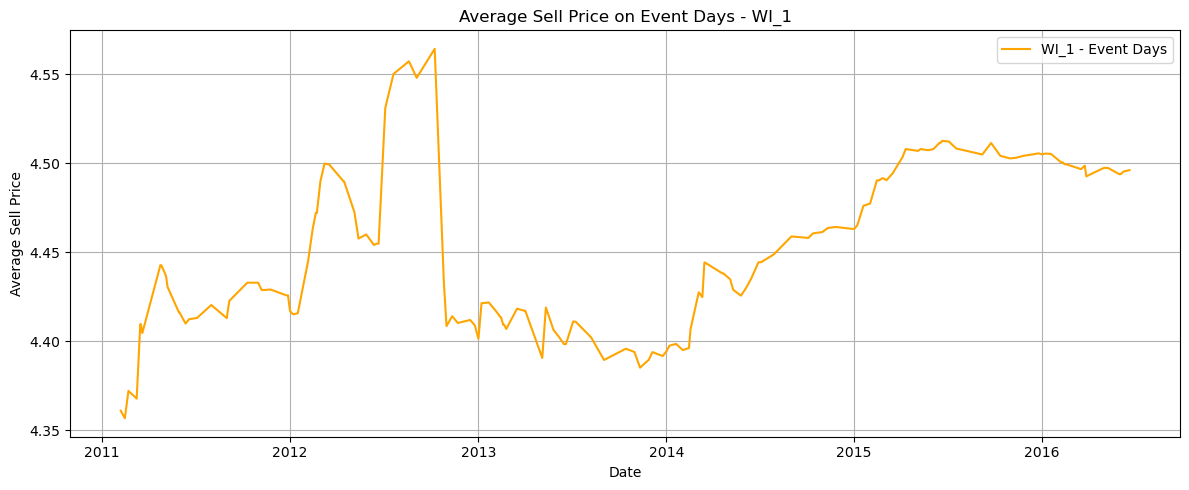

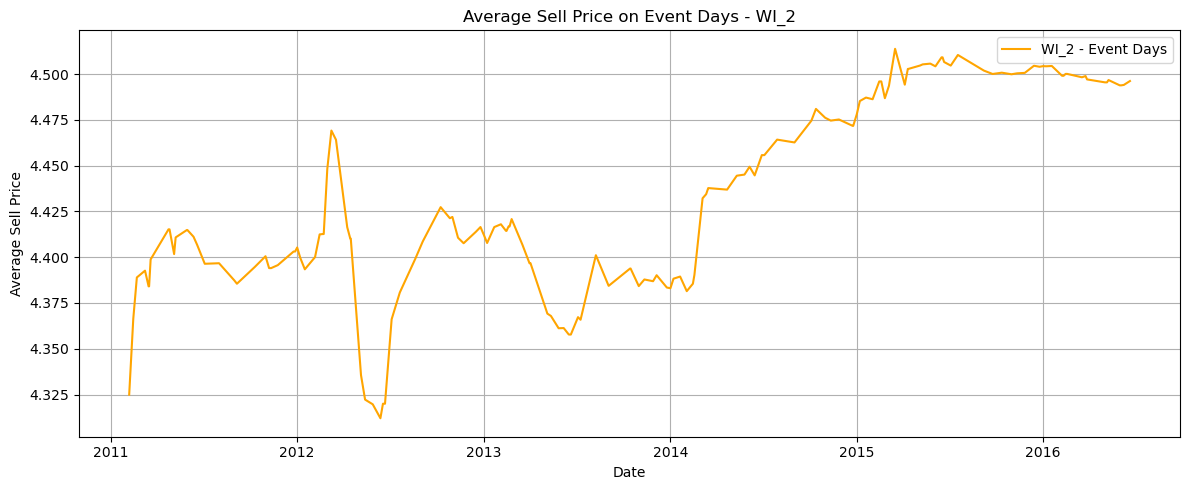

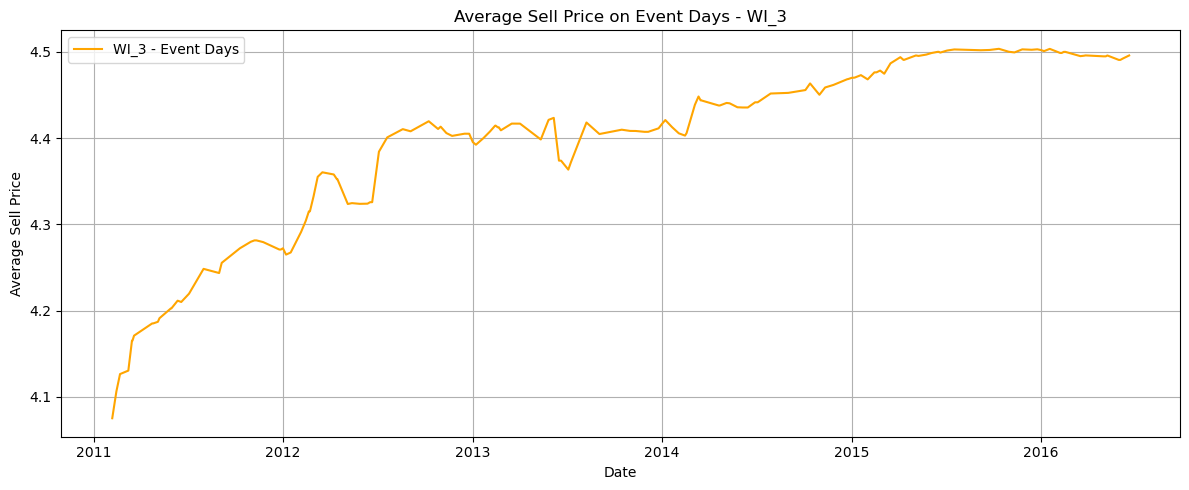

In [41]:
event_dates = calendar[calendar['event_name_1'].notnull()]['date'].unique()
sales_on_events = merged[merged['date'].isin(event_dates)]
sales_event_store = sales_on_events.groupby(['store_id', 'date'])['sell_price'].mean().reset_index()
stores = sales_event_store['store_id'].unique()[:10]
for store in stores:
    plt.figure(figsize=(12, 5))
    store_data = sales_event_store[sales_event_store['store_id'] == store]
    plt.plot(store_data['date'], store_data['sell_price'], label=f'{store} - Event Days', color='orange')
    plt.title(f'Average Sell Price on Event Days - {store}')
    plt.xlabel('Date')
    plt.ylabel('Average Sell Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

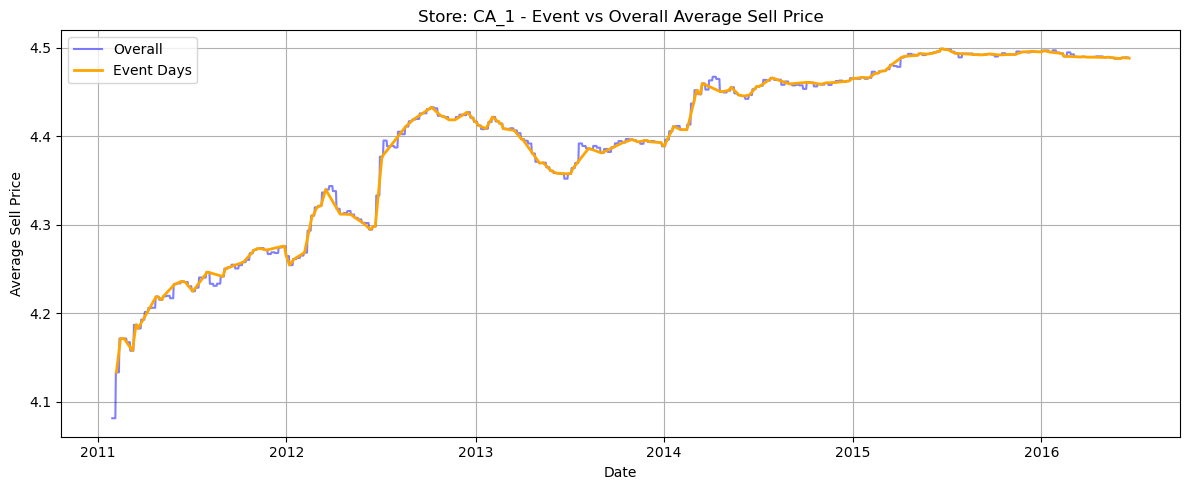

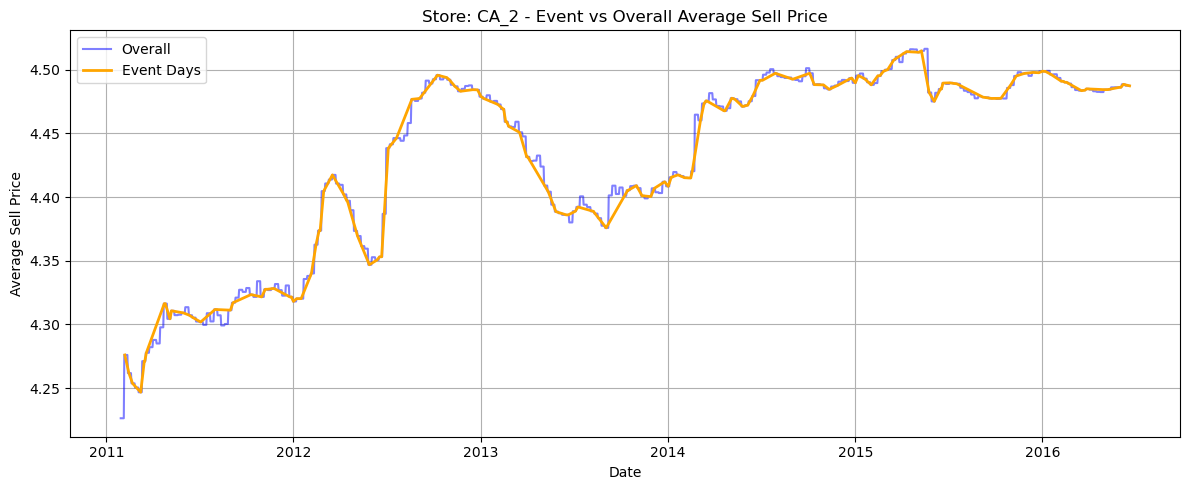

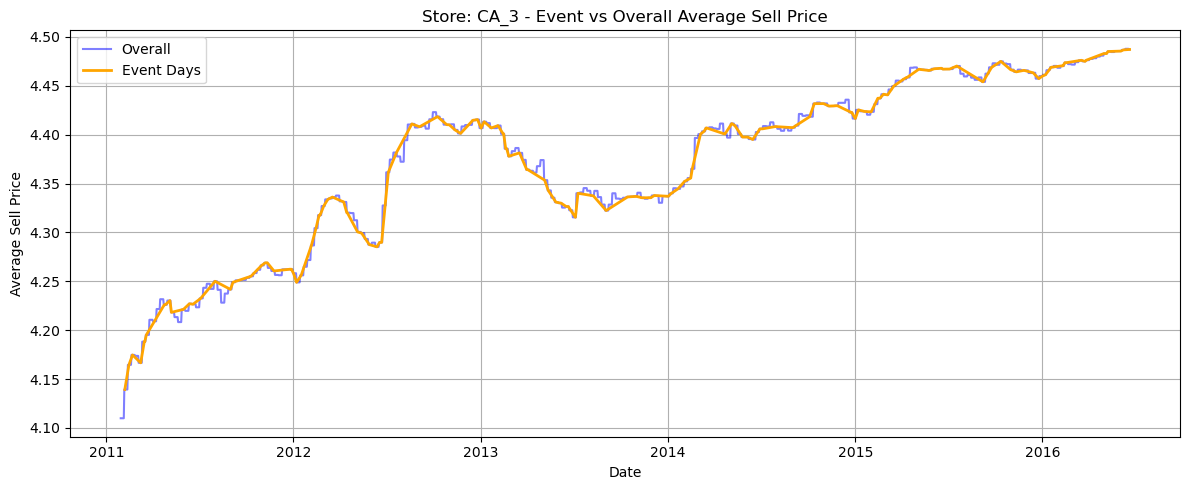

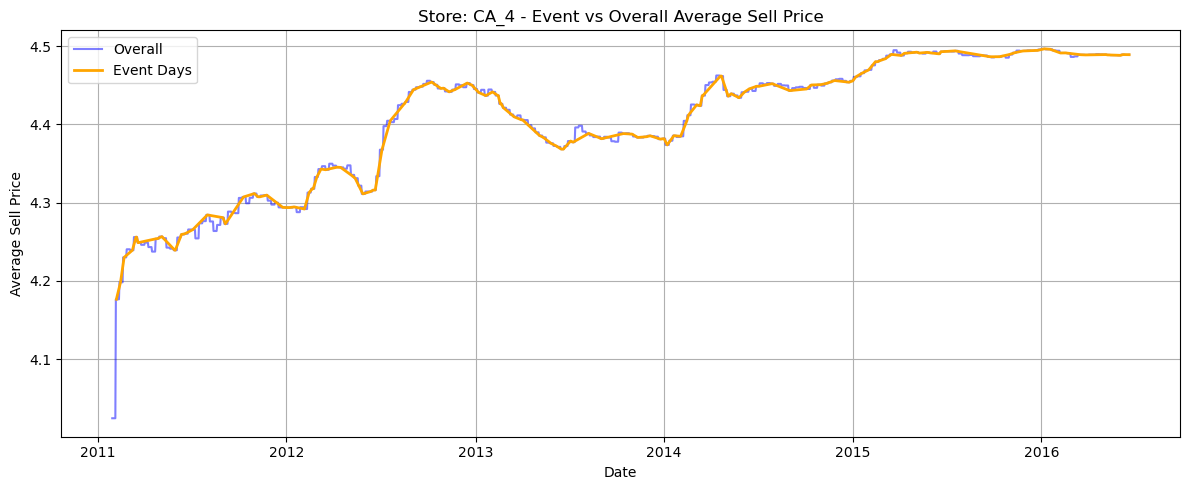

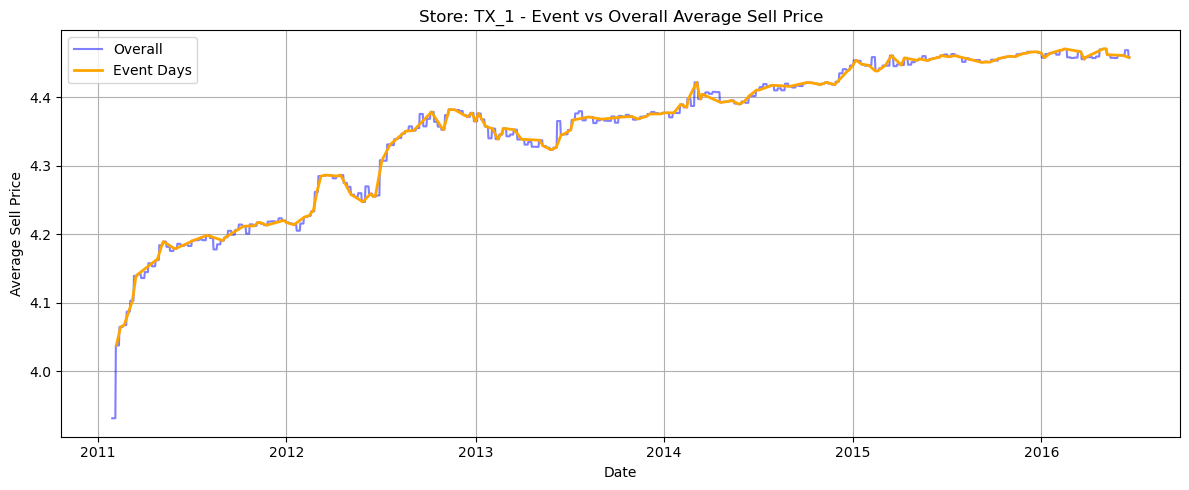

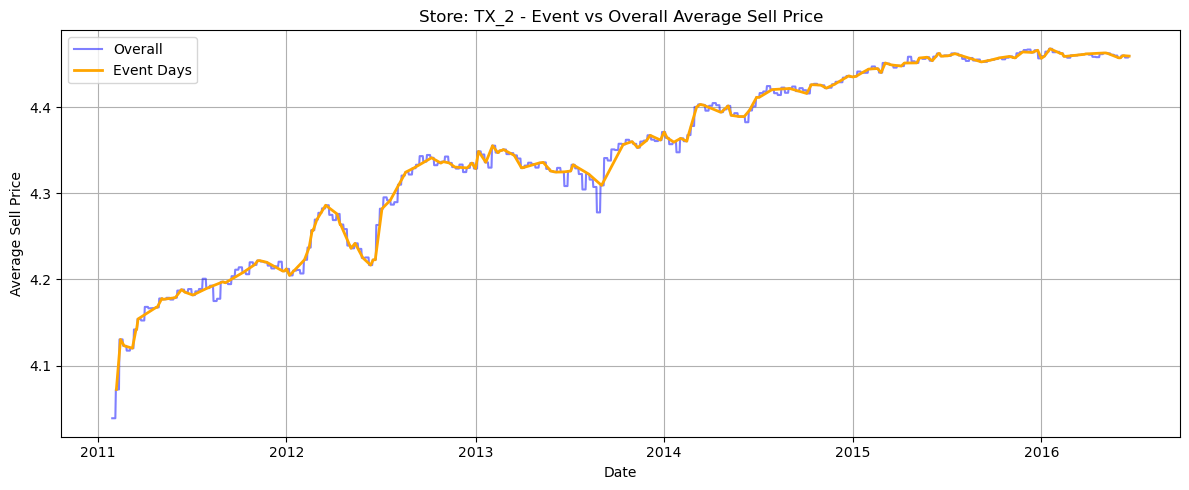

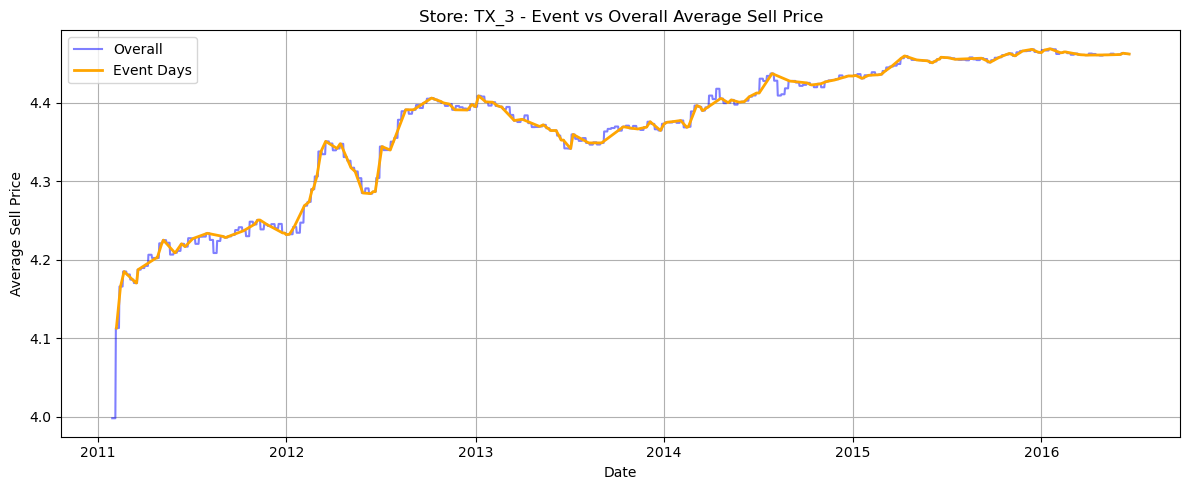

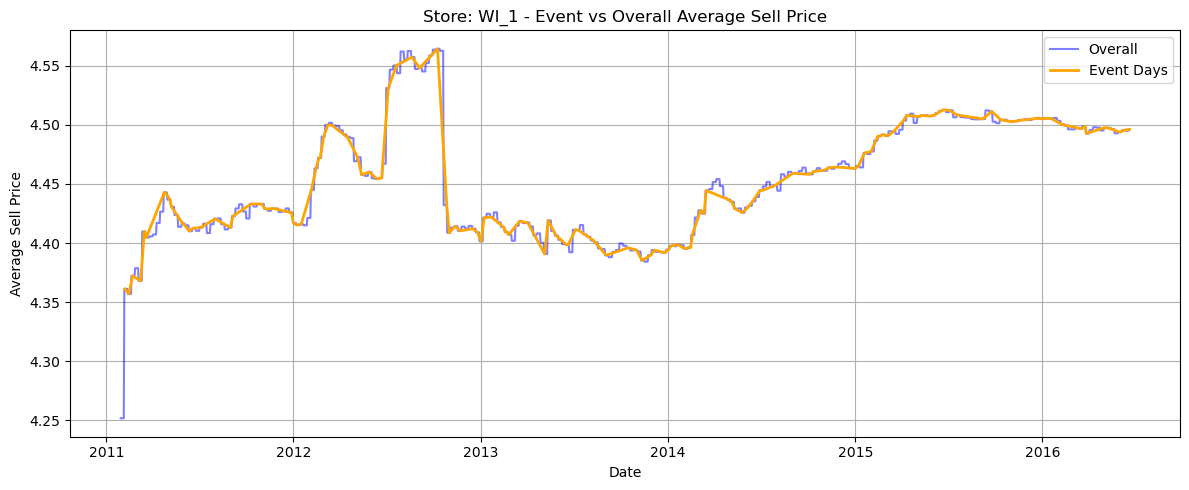

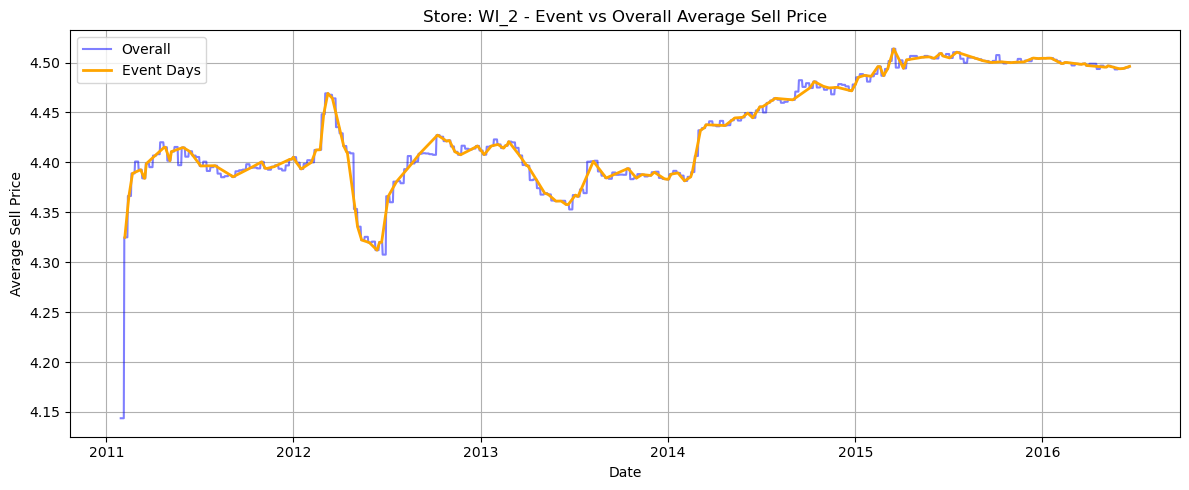

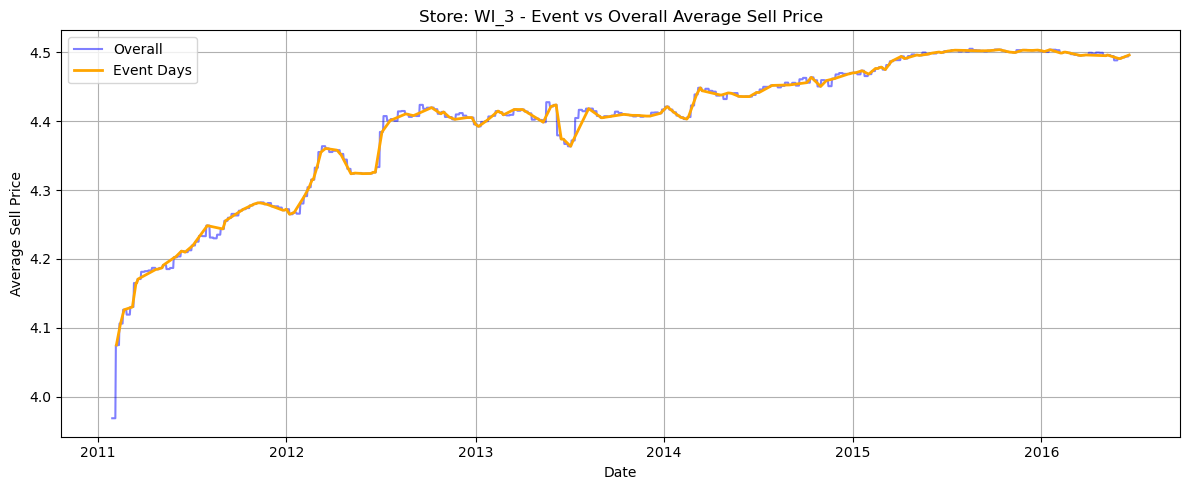

In [42]:
overall_sales = merged.groupby(['store_id', 'date'])['sell_price'].mean().reset_index()
event_sales = merged[merged['date'].isin(event_dates)].groupby(['store_id', 'date'])['sell_price'].mean().reset_index()
stores = overall_sales['store_id'].unique()[:10]
for store in stores:
    plt.figure(figsize=(12, 5))
    store_overall = overall_sales[overall_sales['store_id'] == store]
    store_event = event_sales[event_sales['store_id'] == store]
    plt.plot(store_overall['date'], store_overall['sell_price'], label='Overall', alpha=0.5, color='blue')
    plt.plot(store_event['date'], store_event['sell_price'], label='Event Days', linewidth=2, color='orange')
    plt.title(f'Store: {store} - Event vs Overall Average Sell Price')
    plt.xlabel('Date')
    plt.ylabel('Average Sell Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

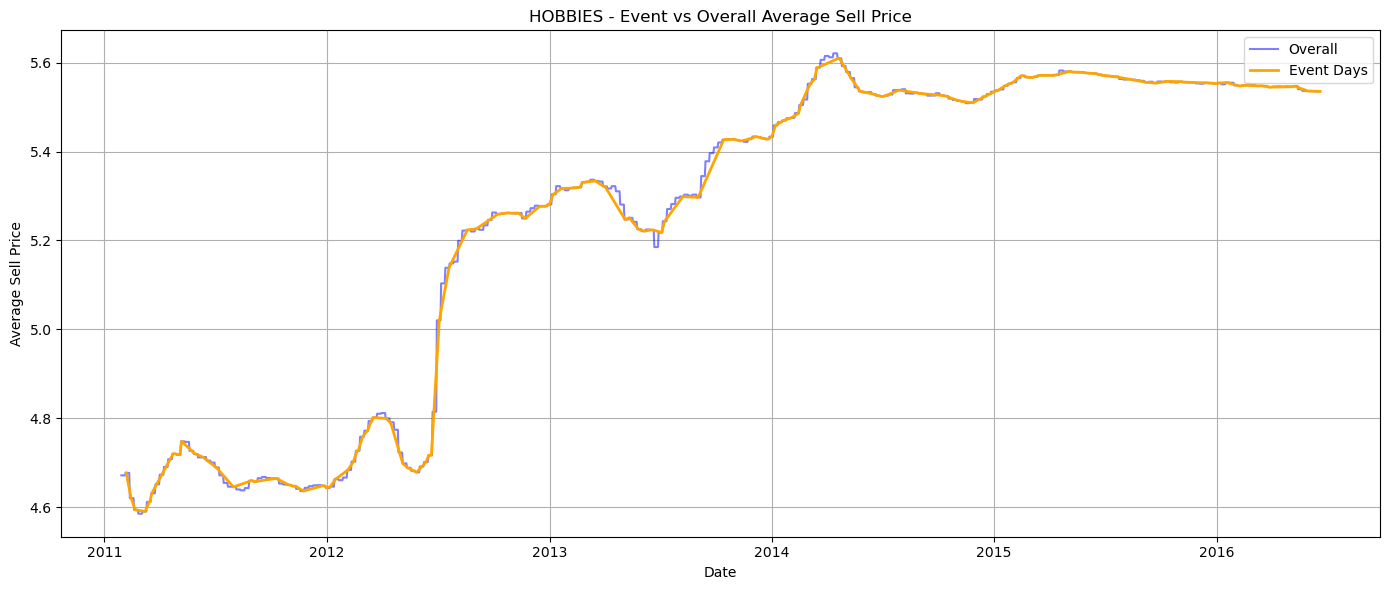

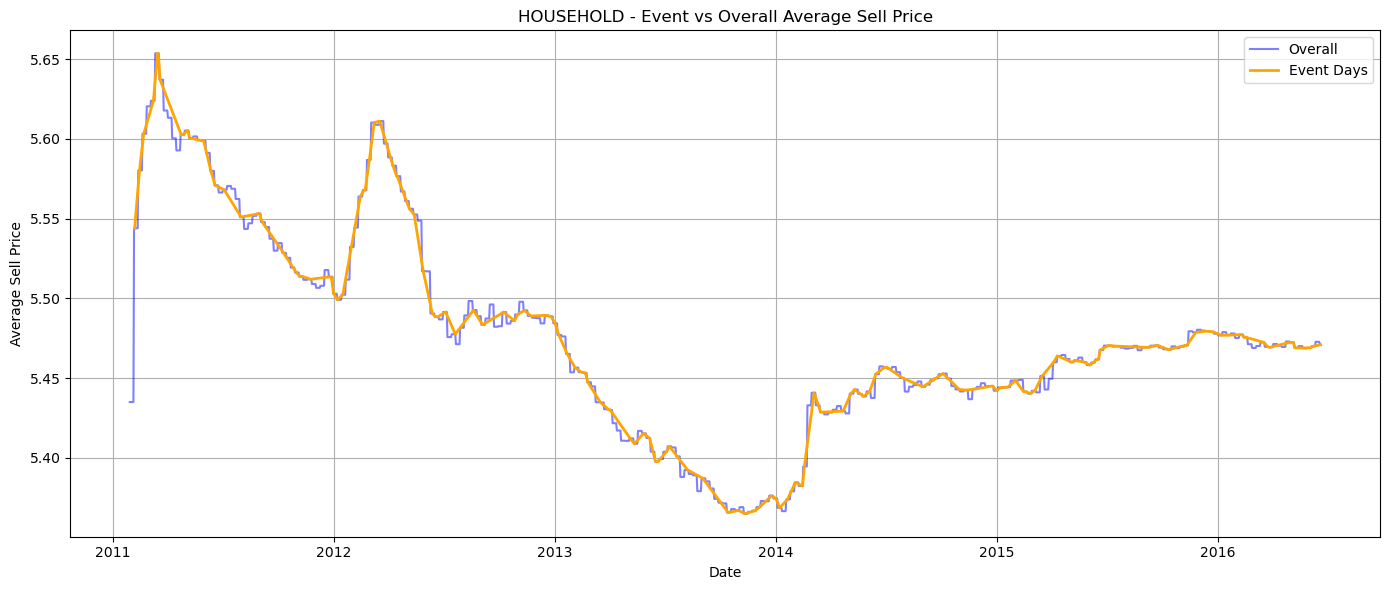

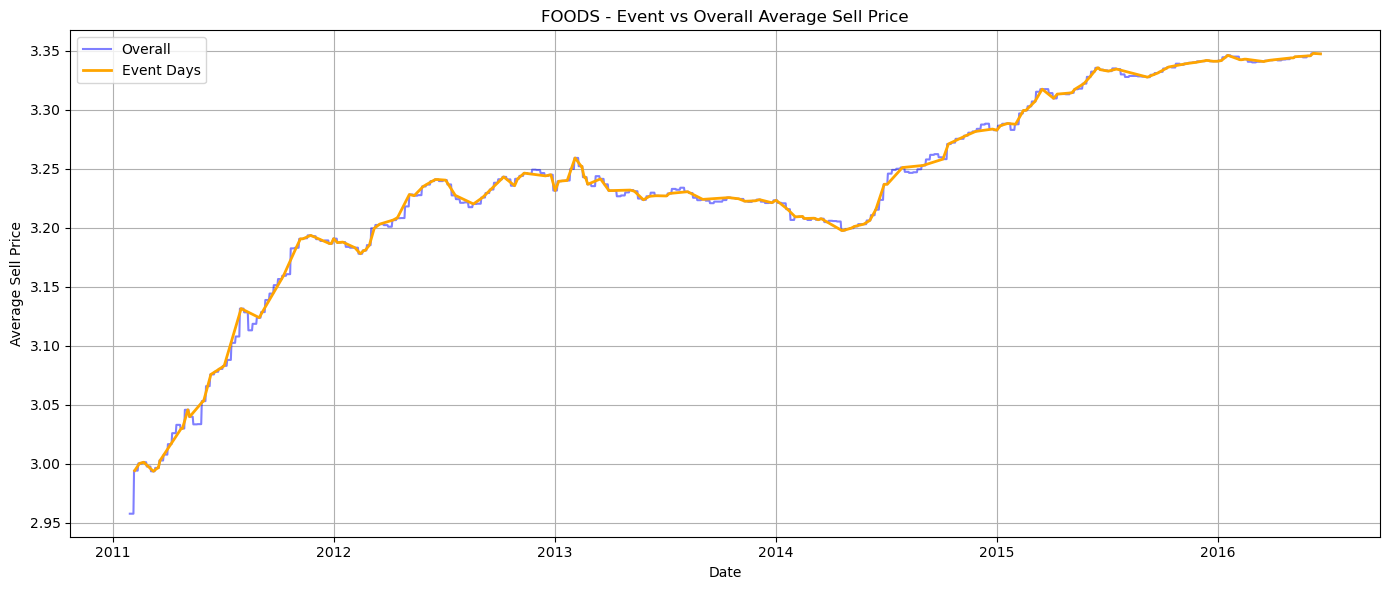

In [43]:
categories = ['HOBBIES', 'HOUSEHOLD', 'FOODS']
for category in categories:
    cat_data = merged[merged['item_id'].str.startswith(category)]
    overall_cat = cat_data.groupby('date')['sell_price'].mean().reset_index()
    event_cat = cat_data[cat_data['date'].isin(event_dates)].groupby('date')['sell_price'].mean().reset_index()
    plt.figure(figsize=(14, 6))
    plt.plot(overall_cat['date'], overall_cat['sell_price'], label='Overall', alpha=0.5, color='blue')
    plt.plot(event_cat['date'], event_cat['sell_price'], label='Event Days', linewidth=2, color='orange')
    plt.title(f'{category} - Event vs Overall Average Sell Price')
    plt.xlabel('Date')
    plt.ylabel('Average Sell Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


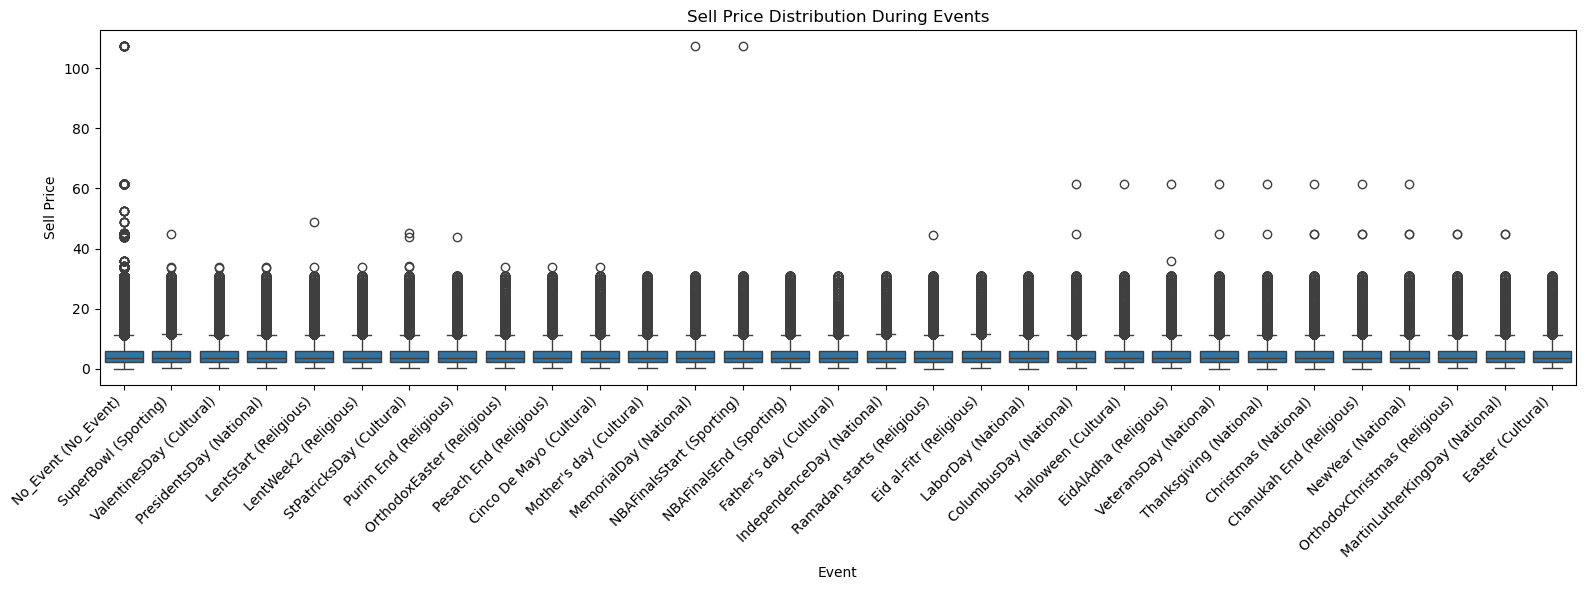

In [44]:
event_df = merged[merged['event_name_1'].notnull()].copy()
event_df['event_label'] = event_df.apply(
    lambda x: f"{x['event_name_1']} ({x['event_type_1']})" if pd.notnull(x['event_type_1']) else x['event_name_1'], axis=1
)
plt.figure(figsize=(16, 6))
sns.boxplot(data=event_df, x='event_label', y='sell_price')
plt.xticks(rotation=45, ha='right')
plt.title('Sell Price Distribution During Events')
plt.xlabel('Event')
plt.ylabel('Sell Price')
plt.tight_layout()
plt.show()

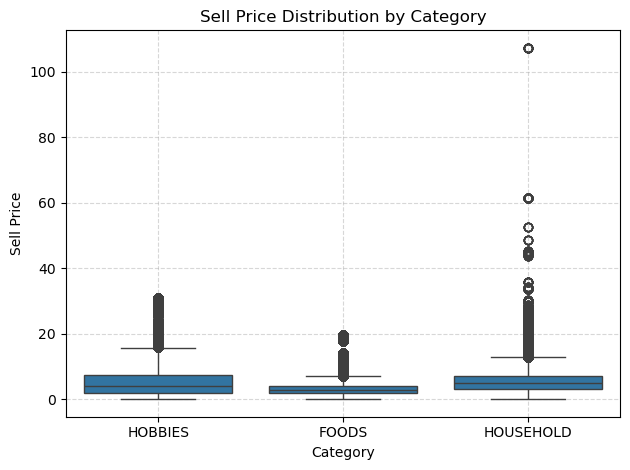

In [45]:
categories = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
filtered_data = merged[merged['item_id'].str.startswith(tuple(categories))].copy()
filtered_data['Category'] = filtered_data['item_id'].str.extract(r'(^[A-Z]+)')
sns.boxplot(data=filtered_data, x='Category', y='sell_price')
plt.title('Sell Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sell Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
filtered = merged[merged['item_id'].str.startswith(tuple(categories))].copy()
filtered['Category'] = filtered['item_id'].str.extract(r'(^[A-Z]+)')
pivot_data = filtered.groupby('Category')['sell_price'].agg(['min', 'max']).reset_index()
min_item_ids = filtered.loc[filtered.groupby('Category')['sell_price'].idxmin()][['Category', 'item_id']].rename(columns={'item_id': 'Min_Item_ID'})
max_item_ids = filtered.loc[filtered.groupby('Category')['sell_price'].idxmax()][['Category', 'item_id']].rename(columns={'item_id': 'Max_Item_ID'})
pivot_result = pivot_data.merge(min_item_ids, on='Category').merge(max_item_ids, on='Category')
print(pivot_result)

    Category   min     max      Min_Item_ID      Max_Item_ID
0      FOODS  0.01   19.48      FOODS_3_413      FOODS_3_298
1    HOBBIES  0.01   30.98    HOBBIES_1_261    HOBBIES_1_361
2  HOUSEHOLD  0.01  107.32  HOUSEHOLD_1_533  HOUSEHOLD_2_406


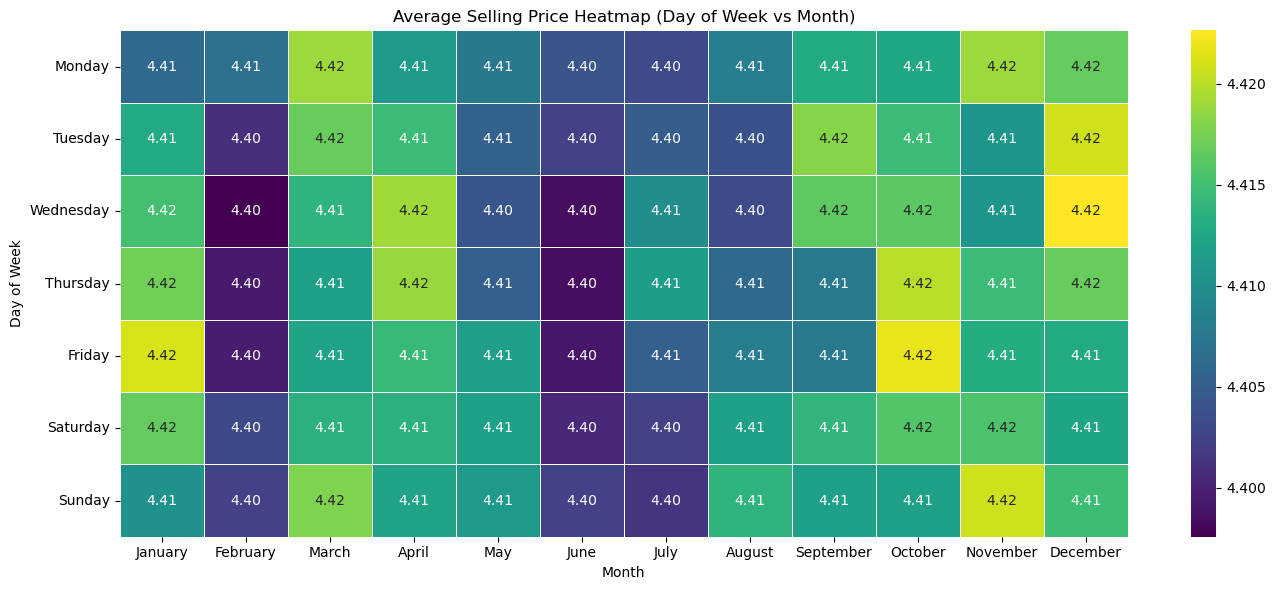

In [47]:
merged['Month'] = merged['date'].dt.month_name()
merged['DayOfWeek'] = merged['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = merged.groupby(['DayOfWeek', 'Month'])['sell_price'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='DayOfWeek', columns='Month', values='sell_price')
heatmap_pivot = heatmap_pivot.reindex(index=day_order, columns=month_order)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Selling Price Heatmap (Day of Week vs Month)')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [48]:
merged['date'] = pd.to_datetime(merged['date'])  # Ensure datetime
merged['store_id'] = merged['store_id'].astype('category')
merged['item_id'] = merged['item_id'].astype('category')
merged['event_name_1'] = merged['event_name_1'].astype('category')
merged['event_type_1'] = merged['event_type_1'].astype('category')
merged['event_name_2'] = merged['event_name_2'].astype('category')
merged['event_type_2'] = merged['event_type_2'].astype('category')


In [49]:
print("Before Removing Duplicates:", merged.shape)
merged.drop_duplicates(inplace=True)
print("After Removing Duplicates:", merged.shape)


Before Removing Duplicates: (47735397, 19)
After Removing Duplicates: (47735397, 19)


In [50]:
# Check and remove negative prices
negative_prices = merged[merged['sell_price'] < 0]
print("Negative Prices Found:", negative_prices.shape[0])

# Remove them
merged = merged[merged['sell_price'] >= 0]


Negative Prices Found: 0


In [51]:
print("Final Cleaned Data Shape:", merged.shape)
print("Columns:", merged.columns.tolist())
merged.describe(include='all').T


Final Cleaned Data Shape: (47735397, 19)
Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price', 'date', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'year_month', 'Month', 'DayOfWeek']


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
store_id,47735397,10,TX_2,4893253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,47735397,3049,HOUSEHOLD_1_087,19690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wm_yr_wk,47735397.0,NaN,NaN,NaN,11382.183154,11101.0,11246.0,11410.0,11517.0,11621.0,148.235972
sell_price,47735397.0,NaN,NaN,NaN,4.410726,0.01,2.18,3.47,5.84,107.32,3.408416
date,47735397,NaN,NaN,NaN,2014-02-15 08:04:01.747851776,2011-01-29 00:00:00,2012-12-13 00:00:00,2014-04-10 00:00:00,2015-05-24 00:00:00,2016-06-19 00:00:00,NaN
weekday,47735397,7,Saturday,6841121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wday,47735397.0,NaN,NaN,NaN,3.996806,1.0,2.0,4.0,6.0,7.0,2.000796
month,47735397.0,NaN,NaN,NaN,6.356977,1.0,3.0,6.0,9.0,12.0,3.426331
year,47735397.0,NaN,NaN,NaN,2013.639931,2011.0,2012.0,2014.0,2015.0,2016.0,1.514132
event_name_1,47735397,31,No_Event,43805087,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Save as pickle or CSV
merged.to_pickle("cleaned_sell_prices.pkl")
# Or CSV (larger)


In [53]:
# Check and remove duplicates (just in case)
duplicates = merged.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates if any
merged= merged.drop_duplicates()


Number of duplicate rows: 0


In [54]:
# Final data type confirmation
print(merged.dtypes)


store_id              category
item_id               category
wm_yr_wk                 int64
sell_price             float64
date            datetime64[ns]
weekday                 object
wday                     int64
month                    int64
year                     int64
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
year_month           period[M]
Month                   object
DayOfWeek               object
dtype: object


In [55]:
# Extract time-based features
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['day'] = merged['date'].dt.day
merged['day_of_week'] = merged['date'].dt.dayofweek  # Monday=0, Sunday=6
merged['is_weekend'] = merged['day_of_week'].isin([5, 6])  # Saturday or Sunday
merged['is_month_start'] = merged['date'].dt.is_month_start
merged['is_month_end'] = merged['date'].dt.is_month_end


In [56]:
# Convert to category dtype
cat_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
for col in cat_cols:
    merged[col] = merged[col].astype('category')


In [57]:
# Encode categories numerically
for col in cat_cols:
    merged[col + '_code'] = merged[col].cat.codes


In [58]:
# Sort data for each item-store combination
merged.sort_values(by=['item_id', 'store_id', 'date'], inplace=True)


In [59]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Assume base demand depends on price: cheaper = more demand
base_demand = 100 - (merged['sell_price'] * 20)  # inverse relation

# Add effect for holidays/events
event_boost = np.where(merged['event_name_1'] != 'No_Event', 10, 0)

# Add weekly seasonality: higher on weekends
weekday_boost = np.where(merged['is_weekend'] == 1, 5, 0)

# Final demand = base + boosts + some noise
merged['demand'] = (
    base_demand + event_boost + weekday_boost + np.random.normal(loc=0, scale=5, size=len(merged))
).clip(lower=0).round().astype(int)



In [60]:
# Grouped lag features
for lag in [1, 7, 14]:
    merged[f'lag_{lag}'] = (
        merged.groupby(['item_id', 'store_id'])['demand'].shift(lag)
    )


/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2300103175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['item_id', 'store_id'])['demand'].shift(lag)
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2300103175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['item_id', 'store_id'])['demand'].shift(lag)
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/2300103175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

In [61]:
# Create rolling mean features
for window in [7, 14]:
    merged[f'rolling_mean_{window}'] = (
        merged.groupby(['item_id', 'store_id'])['demand']
        .shift(1)
        .rolling(window=window)
        .mean()
    )


/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/44587762.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['item_id', 'store_id'])['demand']
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/44587762.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['item_id', 'store_id'])['demand']


In [62]:
# Add rolling mean features (on demand)
for window in [7, 14, 28]:
    merged[f'rolling_mean_{window}'] = (
        merged.groupby(['item_id', 'store_id'])['demand'].transform(lambda x: x.shift(1).rolling(window).mean())
    )


/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/645282600.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['item_id', 'store_id'])['demand'].transform(lambda x: x.shift(1).rolling(window).mean())


In [63]:
# Create time-based features from date
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['week'] = merged['date'].dt.isocalendar().week
merged['day'] = merged['date'].dt.day
merged['dayofweek'] = merged['date'].dt.dayofweek
merged['is_weekend'] = merged['dayofweek'].isin([5, 6]).astype(int)
merged['is_month_start'] = merged['date'].dt.is_month_start.astype(int)
merged['is_month_end'] = merged['date'].dt.is_month_end.astype(int)


In [64]:
merged[
    ['date', 'item_id', 'store_id', 'demand', 
     'lag_1', 'lag_7', 'lag_14', 
     'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_28',
     'month', 'week', 'day', 'dayofweek', 'is_weekend']
].head(10)


,date,item_id,store_id,demand,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,rolling_mean_28,month,week,day,dayofweek,is_weekend
2573162,2011-01-29,FOODS_1_001,CA_1,67,NaN,NaN,NaN,NaN,NaN,NaN,1,4,29,5,1
2573163,2011-01-30,FOODS_1_001,CA_1,64,67.0,NaN,NaN,NaN,NaN,NaN,1,4,30,6,1
2573164,2011-01-31,FOODS_1_001,CA_1,63,64.0,NaN,NaN,NaN,NaN,NaN,1,5,31,0,0
2573165,2011-02-01,FOODS_1_001,CA_1,68,63.0,NaN,NaN,NaN,NaN,NaN,2,5,1,1,0
2573166,2011-02-02,FOODS_1_001,CA_1,59,68.0,NaN,NaN,NaN,NaN,NaN,2,5,2,2,0
2573167,2011-02-03,FOODS_1_001,CA_1,59,59.0,NaN,NaN,NaN,NaN,NaN,2,5,3,3,0
2573168,2011-02-04,FOODS_1_001,CA_1,68,59.0,NaN,NaN,NaN,NaN,NaN,2,5,4,4,0
2573169,2011-02-05,FOODS_1_001,CA_1,69,68.0,67.0,NaN,64.000000,NaN,NaN,2,5,5,5,1
2573170,2011-02-06,FOODS_1_001,CA_1,73,69.0,64.0,NaN,64.285714,NaN,NaN,2,5,6,6,1
2573171,2011-02-07,FOODS_1_001,CA_1,63,73.0,63.0,NaN,65.571429,NaN,NaN,2,6,7,0,0


In [65]:
merged['is_weekend'] = merged['weekday'].isin(['Saturday', 'Sunday']).astype(int)
merged['is_event'] = merged['event_name_1'].notnull().astype(int)


In [66]:
merged['price_change'] = merged.groupby(['item_id', 'store_id'])['sell_price'].diff()
merged['price_max'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform('max')
merged['price_norm'] = merged['sell_price'] / merged['price_max']


/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/4159132296.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged['price_change'] = merged.groupby(['item_id', 'store_id'])['sell_price'].diff()
/var/folders/mv/6z_83wj91vgfsy7fvhjm51180000gn/T/ipykernel_54289/4159132296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged['price_max'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform('max')


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged[['demand_scaled']] = scaler.fit_transform(merged[['demand']])


In [68]:
# Convert weekday column to lowercase for consistency
merged['weekday'] = merged['weekday'].str.lower()

# Feature: is_weekend (Saturday or Sunday)
merged['is_weekend'] = merged['weekday'].isin(['saturday', 'sunday']).astype(int)

# Feature: is_event (any non-null event name)
merged['is_event'] = merged['event_name_1'].notnull().astype(int)

# Quick check
merged[['weekday', 'event_name_1', 'is_weekend', 'is_event']].sample(5)


,weekday,event_name_1,is_weekend,is_event
29501634,wednesday,No_Event,0,1
18773347,monday,No_Event,0,1
24014797,wednesday,No_Event,0,1
9131263,monday,No_Event,0,1
9864813,thursday,No_Event,0,1


In [ ]:
# Sort for rolling & lag computations
merged = merged.sort_values(['item_id', 'store_id', 'date'])

# 1. Max and Min Price per item-store
merged['price_max_item_store'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform('max')
merged['price_min_item_store'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform('min')

# 2. Normalized price (between 0 and 1)
merged['price_norm'] = (
    (merged['sell_price'] - merged['price_min_item_store']) /
    (merged['price_max_item_store'] - merged['price_min_item_store'])
)

# 3. Price change from previous day
merged['price_change_t1'] = merged.groupby(['item_id', 'store_id'])['sell_price'].diff(1)

# 4. Rolling mean and std (window = 7 days)
merged['rolling_price_mean_7'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform(lambda x: x.rolling(window=7).mean())
merged['rolling_price_std_7'] = merged.groupby(['item_id', 'store_id'])['sell_price'].transform(lambda x: x.rolling(window=7).std())

# Quick check
merged[['item_id', 'store_id', 'sell_price', 'price_norm', 'price_change_t1', 'rolling_price_mean_7']].sample(5)


In [ ]:
# Convert to datetime if not already
merged['date'] = pd.to_datetime(merged['date'])

# Extract calendar features
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['week'] = merged['date'].dt.isocalendar().week
merged['day'] = merged['date'].dt.day
merged['dayofweek'] = merged['date'].dt.dayofweek

# Weekend flags
merged['is_weekend'] = merged['dayofweek'].isin([5, 6]).astype(int)

# Month start/end
merged['is_month_start'] = merged['date'].dt.is_month_start.astype(int)
merged['is_month_end'] = merged['date'].dt.is_month_end.astype(int)

# View some results
merged[['date', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'is_month_start']].sample(5)


In [ ]:
# Check final shape
print("Final dataset shape:", merged.shape)

# Check column types and non-null counts
print("\nColumn summary:")
print(merged.info())

# Display a few rows to review structure
merged.sample(5)



In [ ]:
# 1. Lag Differences (Momentum)
# -------------------------------
merged['lag_7_diff'] = merged['lag_7'] - merged['lag_14']
merged['lag_1_diff'] = merged['lag_1'] - merged['lag_7']

In [ ]:
# 2. Rolling Stats of Demand
# -------------------------------
merged['rolling_std_7'] = merged.groupby(['store_id', 'item_id'])['demand'].transform(lambda x: x.rolling(7).std())
merged['rolling_min_7'] = merged.groupby(['store_id', 'item_id'])['demand'].transform(lambda x: x.rolling(7).min())
merged['rolling_max_7'] = merged.groupby(['store_id', 'item_id'])['demand'].transform(lambda x: x.rolling(7).max())

In [ ]:
# 3. Price-Demand Interaction Features
# -------------------------------
merged['price_demand_ratio'] = merged['sell_price'] / (merged['demand'] + 1)
merged['price_vs_max'] = merged['sell_price'] / (merged['price_max_item_store'] + 1e-5)

In [ ]:
# 4. Cumulative Demand
# -------------------------------
merged['cum_demand_per_item_store'] = merged.groupby(['store_id', 'item_id'])['demand'].cumsum()


In [ ]:
# 5. Days Since Last Sale
# -------------------------------
def calc_days_since_last_sale(x):
    out = []
    count = 0
    for val in x:
        if val == 0:
            count += 1
        else:
            count = 0
        out.append(count)
    return out

merged['days_since_last_sale'] = merged.groupby(['store_id', 'item_id'])['demand'].transform(calc_days_since_last_sale)

# -------------------------------

In [ ]:
# 6. Categorical Codes for Modeling
# -------------------------------
merged['store_id_code'] = merged['store_id'].cat.codes
merged['item_id_code'] = merged['item_id'].cat.codes


In [ ]:
# 7. Lag Features for Price
# -------------------------------
merged['price_lag_1'] = merged.groupby(['store_id', 'item_id'])['sell_price'].shift(1)
merged['price_lag_diff'] = merged['sell_price'] - merged['price_lag_1']


In [ ]:
# 8. Calendar/Time-based Features
# -------------------------------
merged['week_of_year'] = merged['date'].dt.isocalendar().week.astype(int)
merged['quarter'] = merged['date'].dt.quarter

# -------------------------------
# Done
# -------------------------------
print("Feature engineering completed.")

In [ ]:
merged.head()

In [ ]:
merged[merged['event_name_1_code'] == 1]

In [ ]:
merged.head()